Se tienen $n$ máquinas que deben estar en funcionamiento y $s$ máquinas de repuesto que reemplazan las rotas en el momento que se rompen. Las maquinas rotas tienen un tiempo de reparación que se determina por alguna distribución $G$ y el tiempo de vida de las máquinas se determina por una distribución $F$.

Al romperse una máquina tiene un costo de reparación $c$ y un tiempo de reparación $r$, se puede elegir repararla o comprar una nueva en cuyos casos:

- Si se repara la máquina volverá a estar disponible en el tiempo $r$ habiendo consumido un costo $c$ 
- Si no se repara, se compra una nueva por un costo fijo $C$ y demora un tiempo fijo $R$ en llegar y estar disponible

La fábrica genera dinero continuamente mientras está en funcionamiento a un ritmo $p(t) > 0$ (la fábrica no tiene pérdidas) donde $t$ es el tiempo transcurrido y $p$ una función que define la ganancia. Con esto se dice que la ganancia hasta el momento $t^{*}$ es igual a $P(t^{*}) = \int_{0}^{t^{*}} {p(t)dt}$. En el código $P$ es referida como `profit_function`.

Además, al inicio tiene un presupuesto inicial $f > 0$ al cual se le suman todas las ganancias obtenidas (reinversión total) en todo momento, si en algún momento $f <= 0$, la fábrica quiebra y por lo tanto se detiene la simulación. 

Para decidir si una máquina será reparada o desechada se usa una función $D(c, r, C, R, f) \in \{0, 1\}$ donde $0$ representa que se repara y $1$ que se desecha. Esta función en el código se llama `decition_function`.

Una unidad te tiempo se considera equivalente a un dia de la vida real, una unidad de dinero se considera equivalente a 1000 dólares de la vida real para tener referencias.

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import weibull_min

from src.simulate import *
from src.profit_functions import *
from src.decition_functions import *

In [33]:
event_distribution       = lambda : weibull_min.rvs(2, scale=1) # En promedio una maquina demora 1 dia en romperse
repair_time_distribution = lambda : weibull_min.rvs(2, scale=1) # En promedio una reparacion demora 1 semana en completarse
repair_cost_distribution = lambda : weibull_min.rvs(1, scale=1) # Una maquina tiene un costo promedio de 3000 dolares para repararse

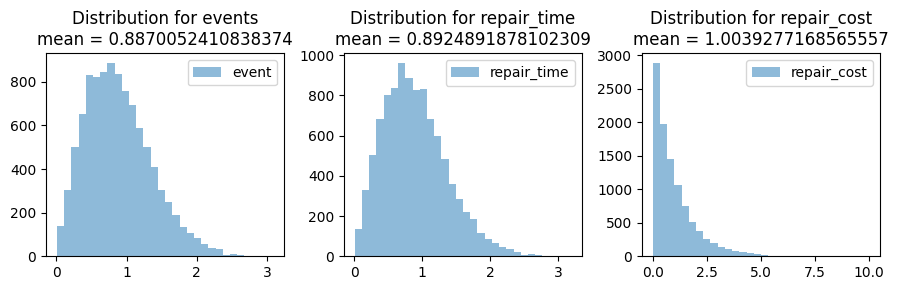

In [34]:
event = np.array([event_distribution() for _ in range(10000)])
repair_time = np.array([repair_time_distribution() for _ in range(10000)])
repair_cost = np.array([repair_cost_distribution() for _ in range(10000)])

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs = axs.flatten()

axs[0].hist(event, bins=30, alpha=0.5, label='event')
axs[0].set_title(f'Distribution for events\nmean = {event.mean()}')
axs[0].legend()

axs[1].hist(repair_time, bins=30, alpha=0.5, label='repair_time')
axs[1].set_title(f'Distribution for repair_time\nmean = {repair_time.mean()}')
axs[1].legend()

axs[2].hist(repair_cost, bins=30, alpha=0.5, label='repair_cost')
axs[2].set_title(f'Distribution for repair_cost\nmean = {repair_cost.mean()}')
axs[2].legend()

for i in range(10, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

## Experimentos


### 1 - Experimento original propuesto en el libro

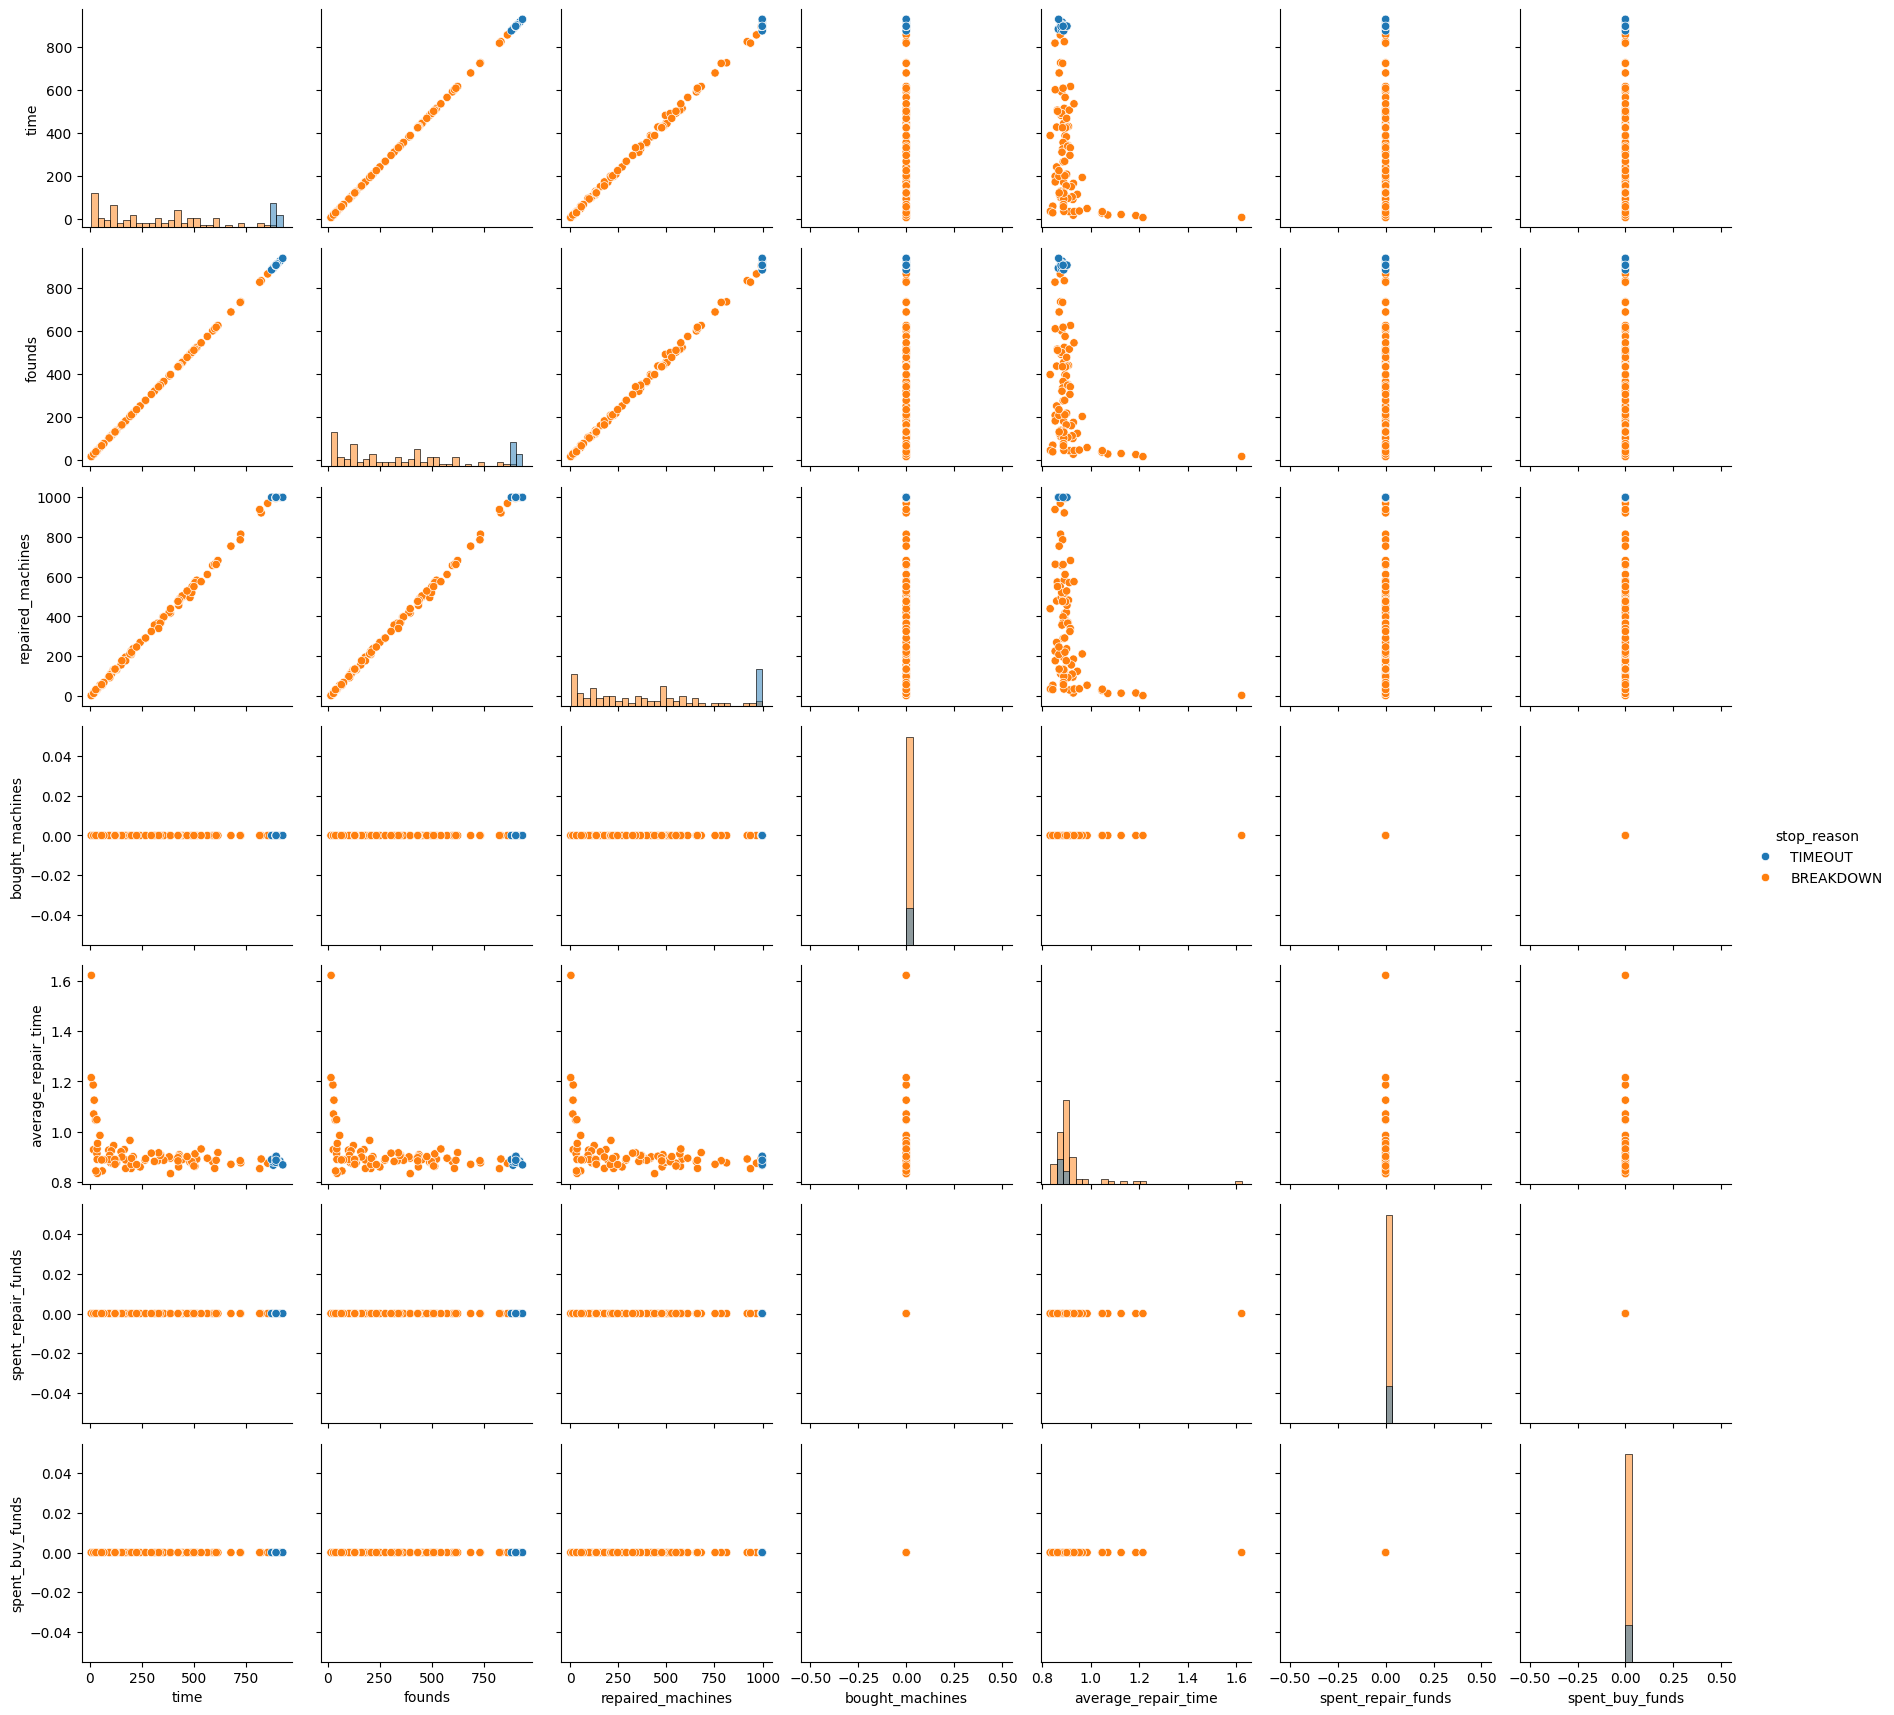

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000            100.000            100.0   
mean   388.028025  398.028025            429.890              0.0   
std    303.540359  303.540359            339.608              0.0   
min      6.600011   16.600011              3.000              0.0   
25%    113.940929  123.940929            130.500              0.0   
50%    346.663328  356.663328            384.000              0.0   
75%    592.514535  602.514535            657.250              0.0   
max    926.938739  936.938739            998.000              0.0   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000               100.0            100.0  
mean              0.910957                 0.0              0.0  
std               0.094497                 0.0              0.0  
min               0.832999                 0.0              0.0  
25%               0.876900                 0.0              0.0  
50%               0.889108                 0.0              0.0  
75%               0.906164                 0.0              0.0  
max               1.622083                 0.0              0.0

In [35]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    0, # costo de compra
                    0, # tiempo de entrega
                    profit_function_id, # funcion de ganancia
                    decition_function_id, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    lambda : 0, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_1_0 = pd.DataFrame(results)

plot = sns.PairGrid(df_1_0, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()

df_1_0.describe()

#### 1.1 - Aumentar el numero de maquinas de repuesto

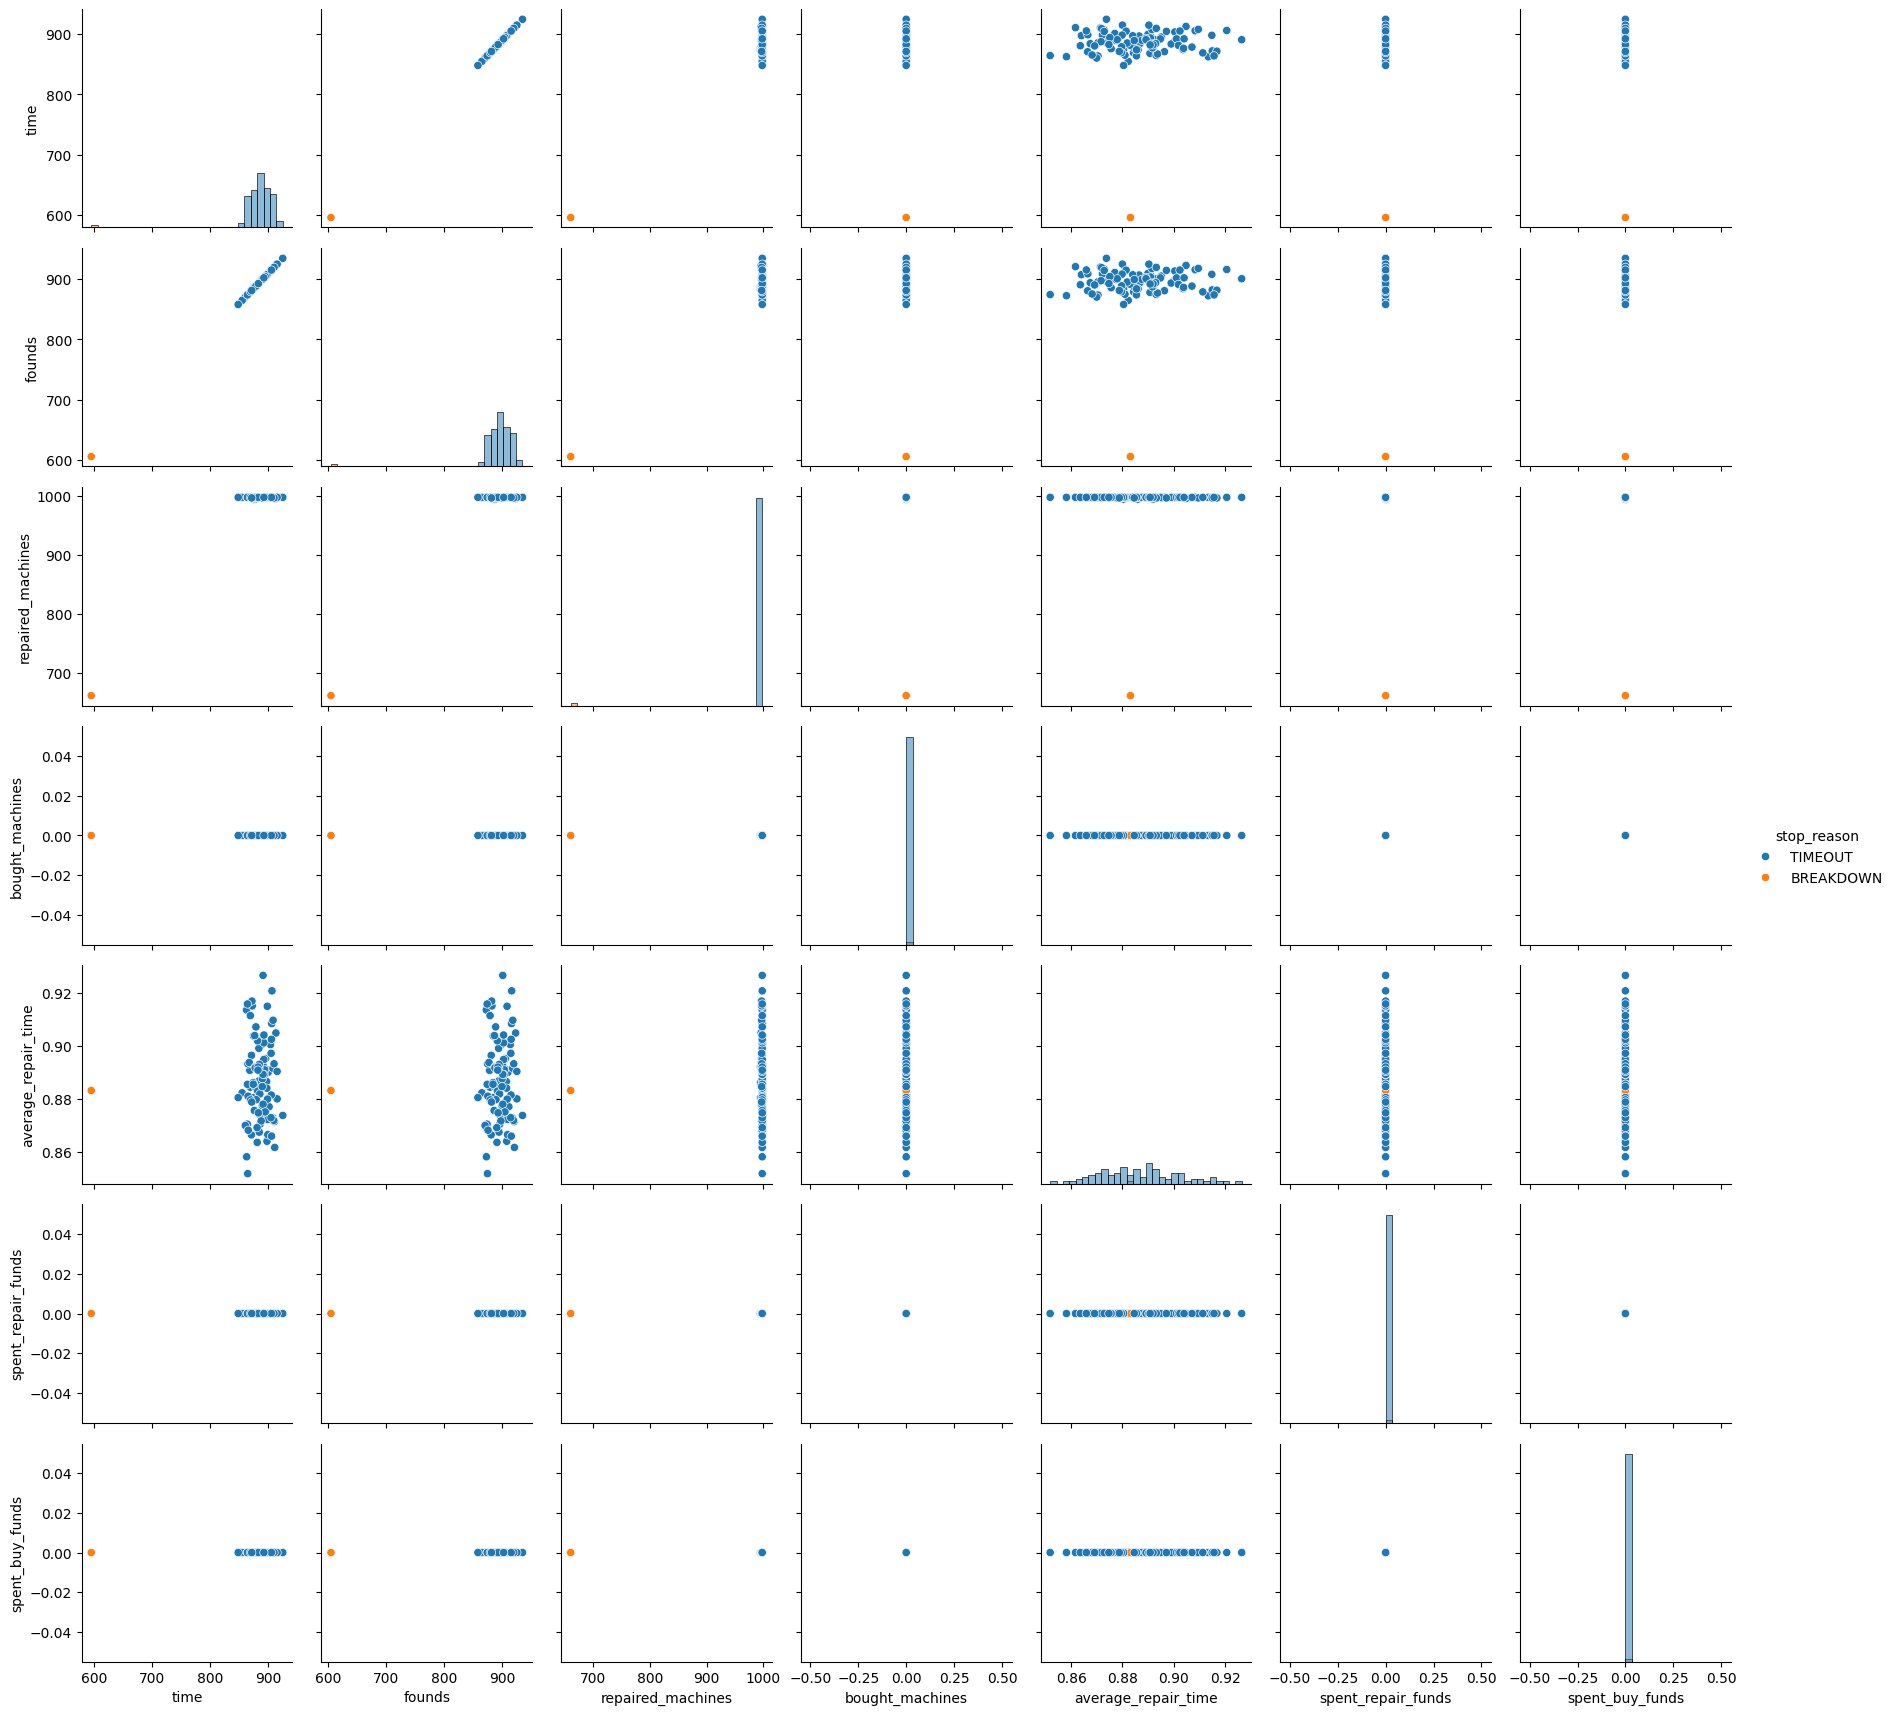

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000         100.000000            100.0   
mean   883.920922  893.920922         994.350000              0.0   
std     33.075366   33.075366          33.677728              0.0   
min    595.153386  605.153386         661.000000              0.0   
25%    874.133696  884.133696         998.000000              0.0   
50%    886.346893  896.346893         998.000000              0.0   
75%    897.865452  907.865452         998.000000              0.0   
max    924.904342  934.904342         998.000000              0.0   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000               100.0            100.0  
mean              0.886672                 0.0              0.0  
std               0.015110                 0.0              0.0  
min               0.851854                 0.0              0.0  
25%               0.874994                 0.0              0.0  
50%               0.885479                 0.0              0.0  
75%               0.895449                 0.0              0.0  
max               0.926442                 0.0              0.0

In [36]:
results = [simulate(20, # cantidad de maquinas
                    10, # cantidad de repuestos
                    10, # presupuesto inicial
                    0, # costo de compra
                    0, # tiempo de entrega
                    profit_function_id, # funcion de ganancia
                    decition_function_id, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    lambda: 0, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_1_1 = pd.DataFrame(results)

plot = sns.PairGrid(df_1_1, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()

df_1_1.describe()

#### 1.2 - Usar SJF para manejar los tiempos de reparacion

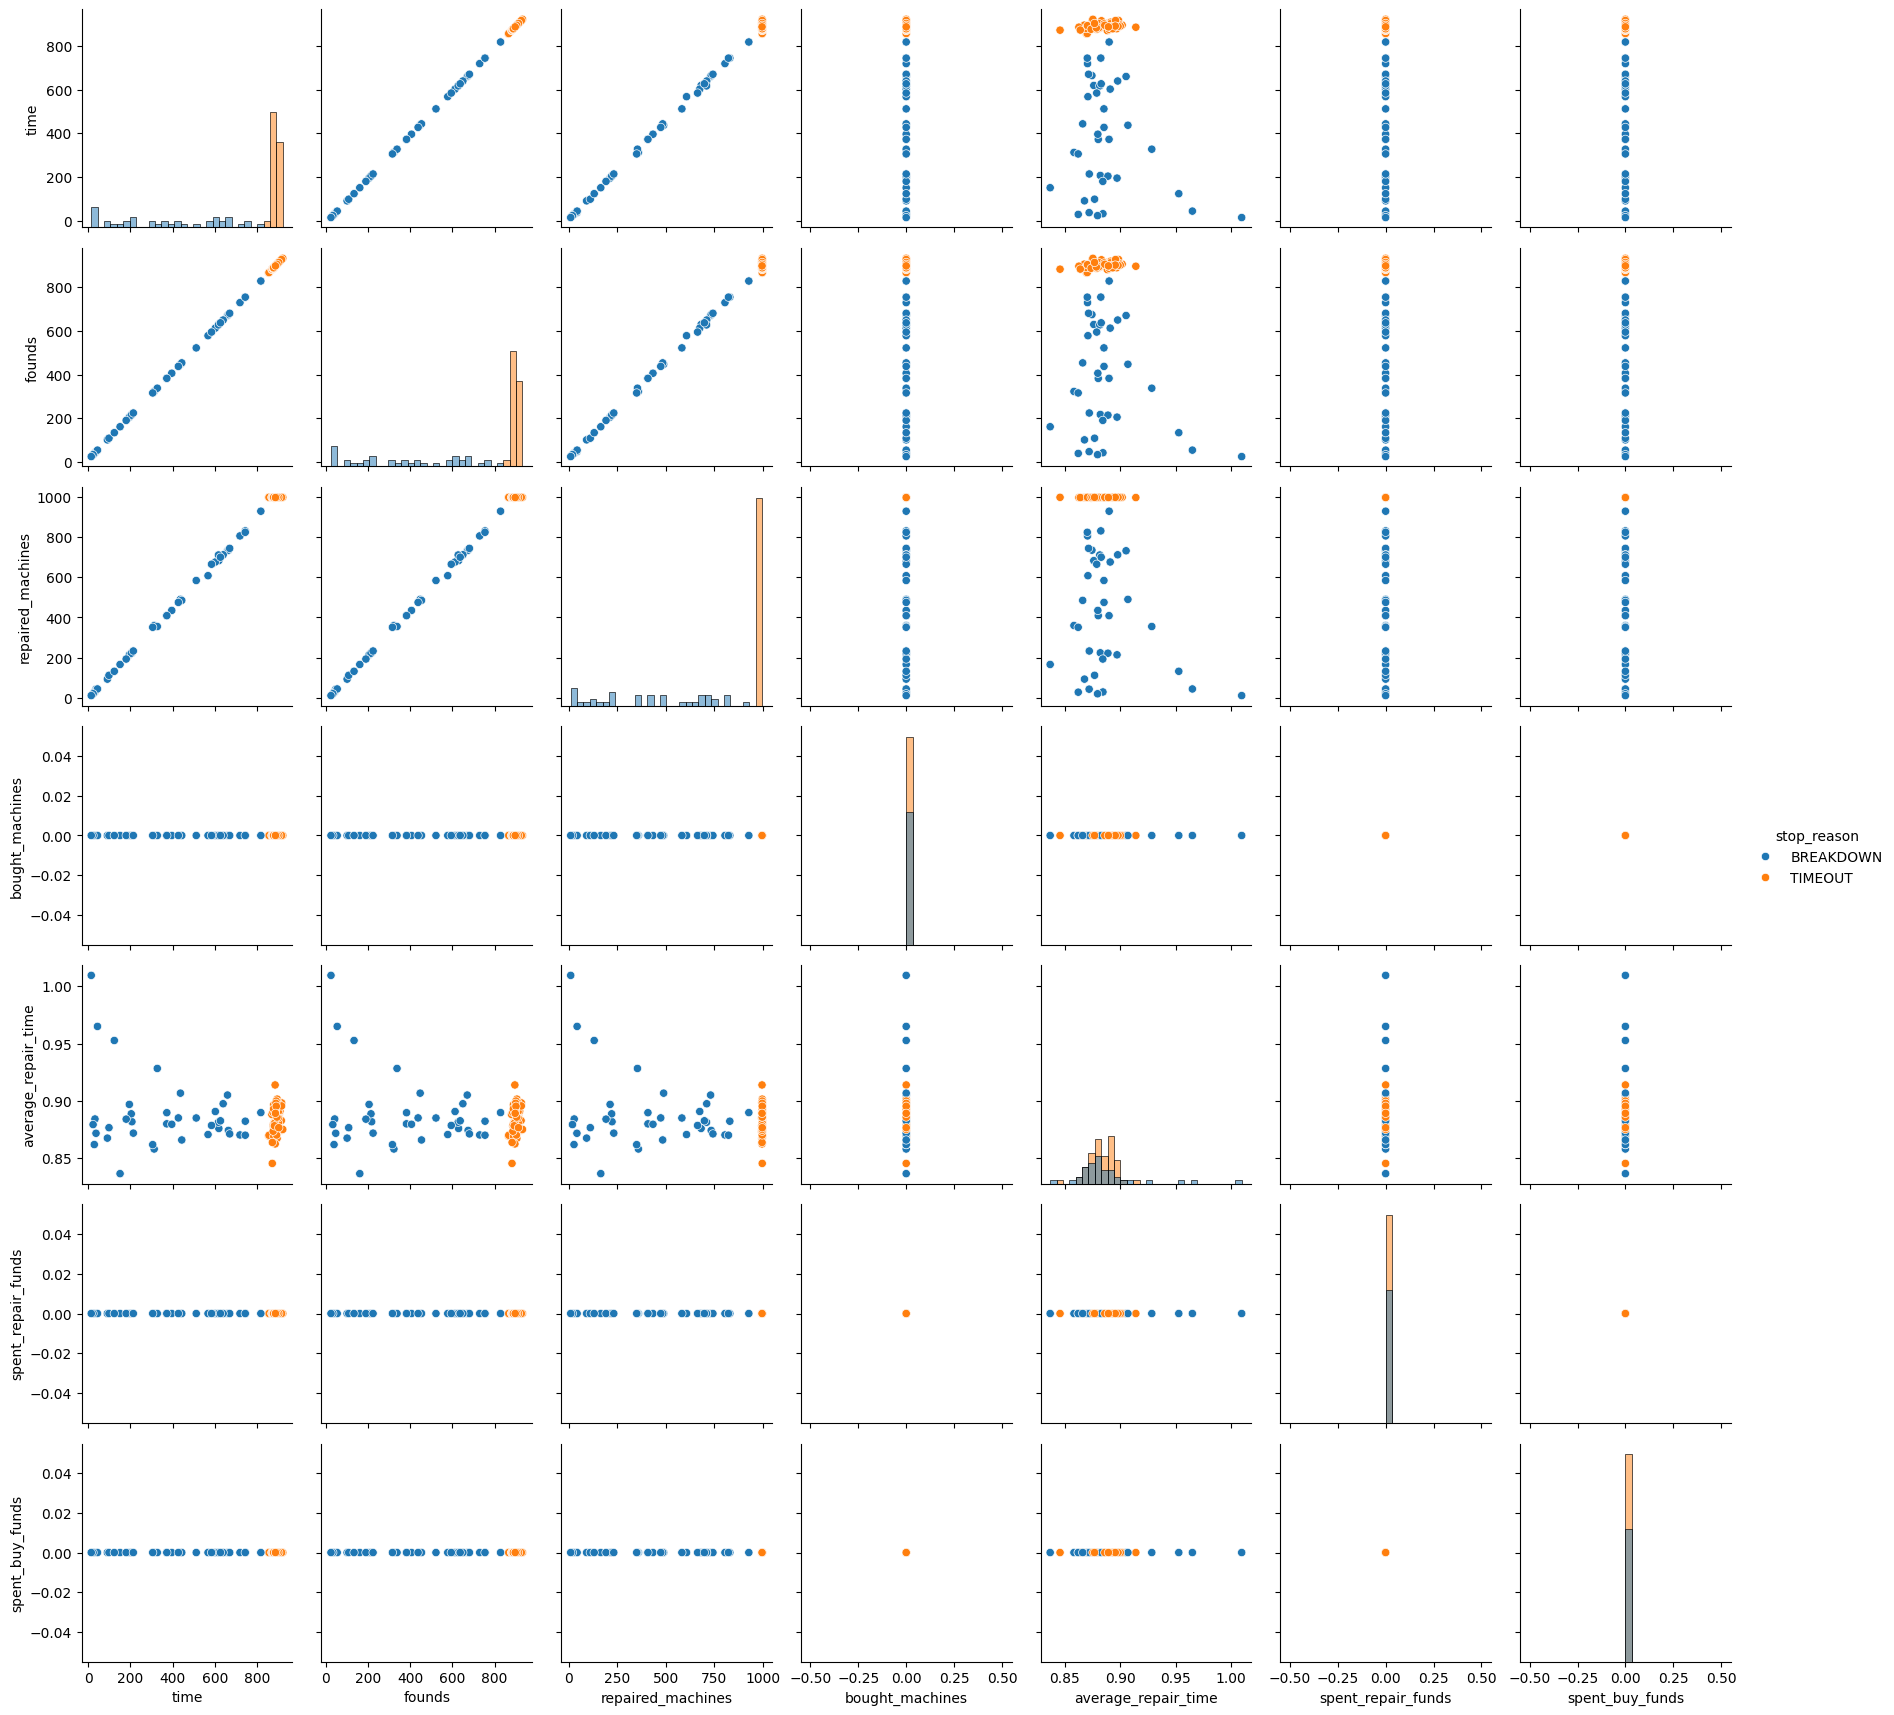

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000         100.000000            100.0   
mean   691.457964  701.457964         773.310000              0.0   
std    294.722439  294.722439         332.098491              0.0   
min     14.717929   24.717929          11.000000              0.0   
25%    554.092308  564.092308         602.000000              0.0   
50%    878.369506  888.369506         997.000000              0.0   
75%    891.783143  901.783143         998.000000              0.0   
max    922.150128  932.150128         998.000000              0.0   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000               100.0            100.0  
mean              0.885034                 0.0              0.0  
std               0.021018                 0.0              0.0  
min               0.836683                 0.0              0.0  
25%               0.875119                 0.0              0.0  
50%               0.882238                 0.0              0.0  
75%               0.890453                 0.0              0.0  
max               1.009525                 0.0              0.0

In [37]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    0, # costo de compra
                    0, # tiempo de entrega
                    profit_function_id, # funcion de ganancia
                    decition_function_id, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    lambda : 0, # distribucion de los costos de reparacion
                    1000, sjf=True) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_1_2 = pd.DataFrame(results)

plot = sns.PairGrid(df_1_2, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()

df_1_2.describe()

#### 1.3 - Usar una distribucion para el costo de reparacion

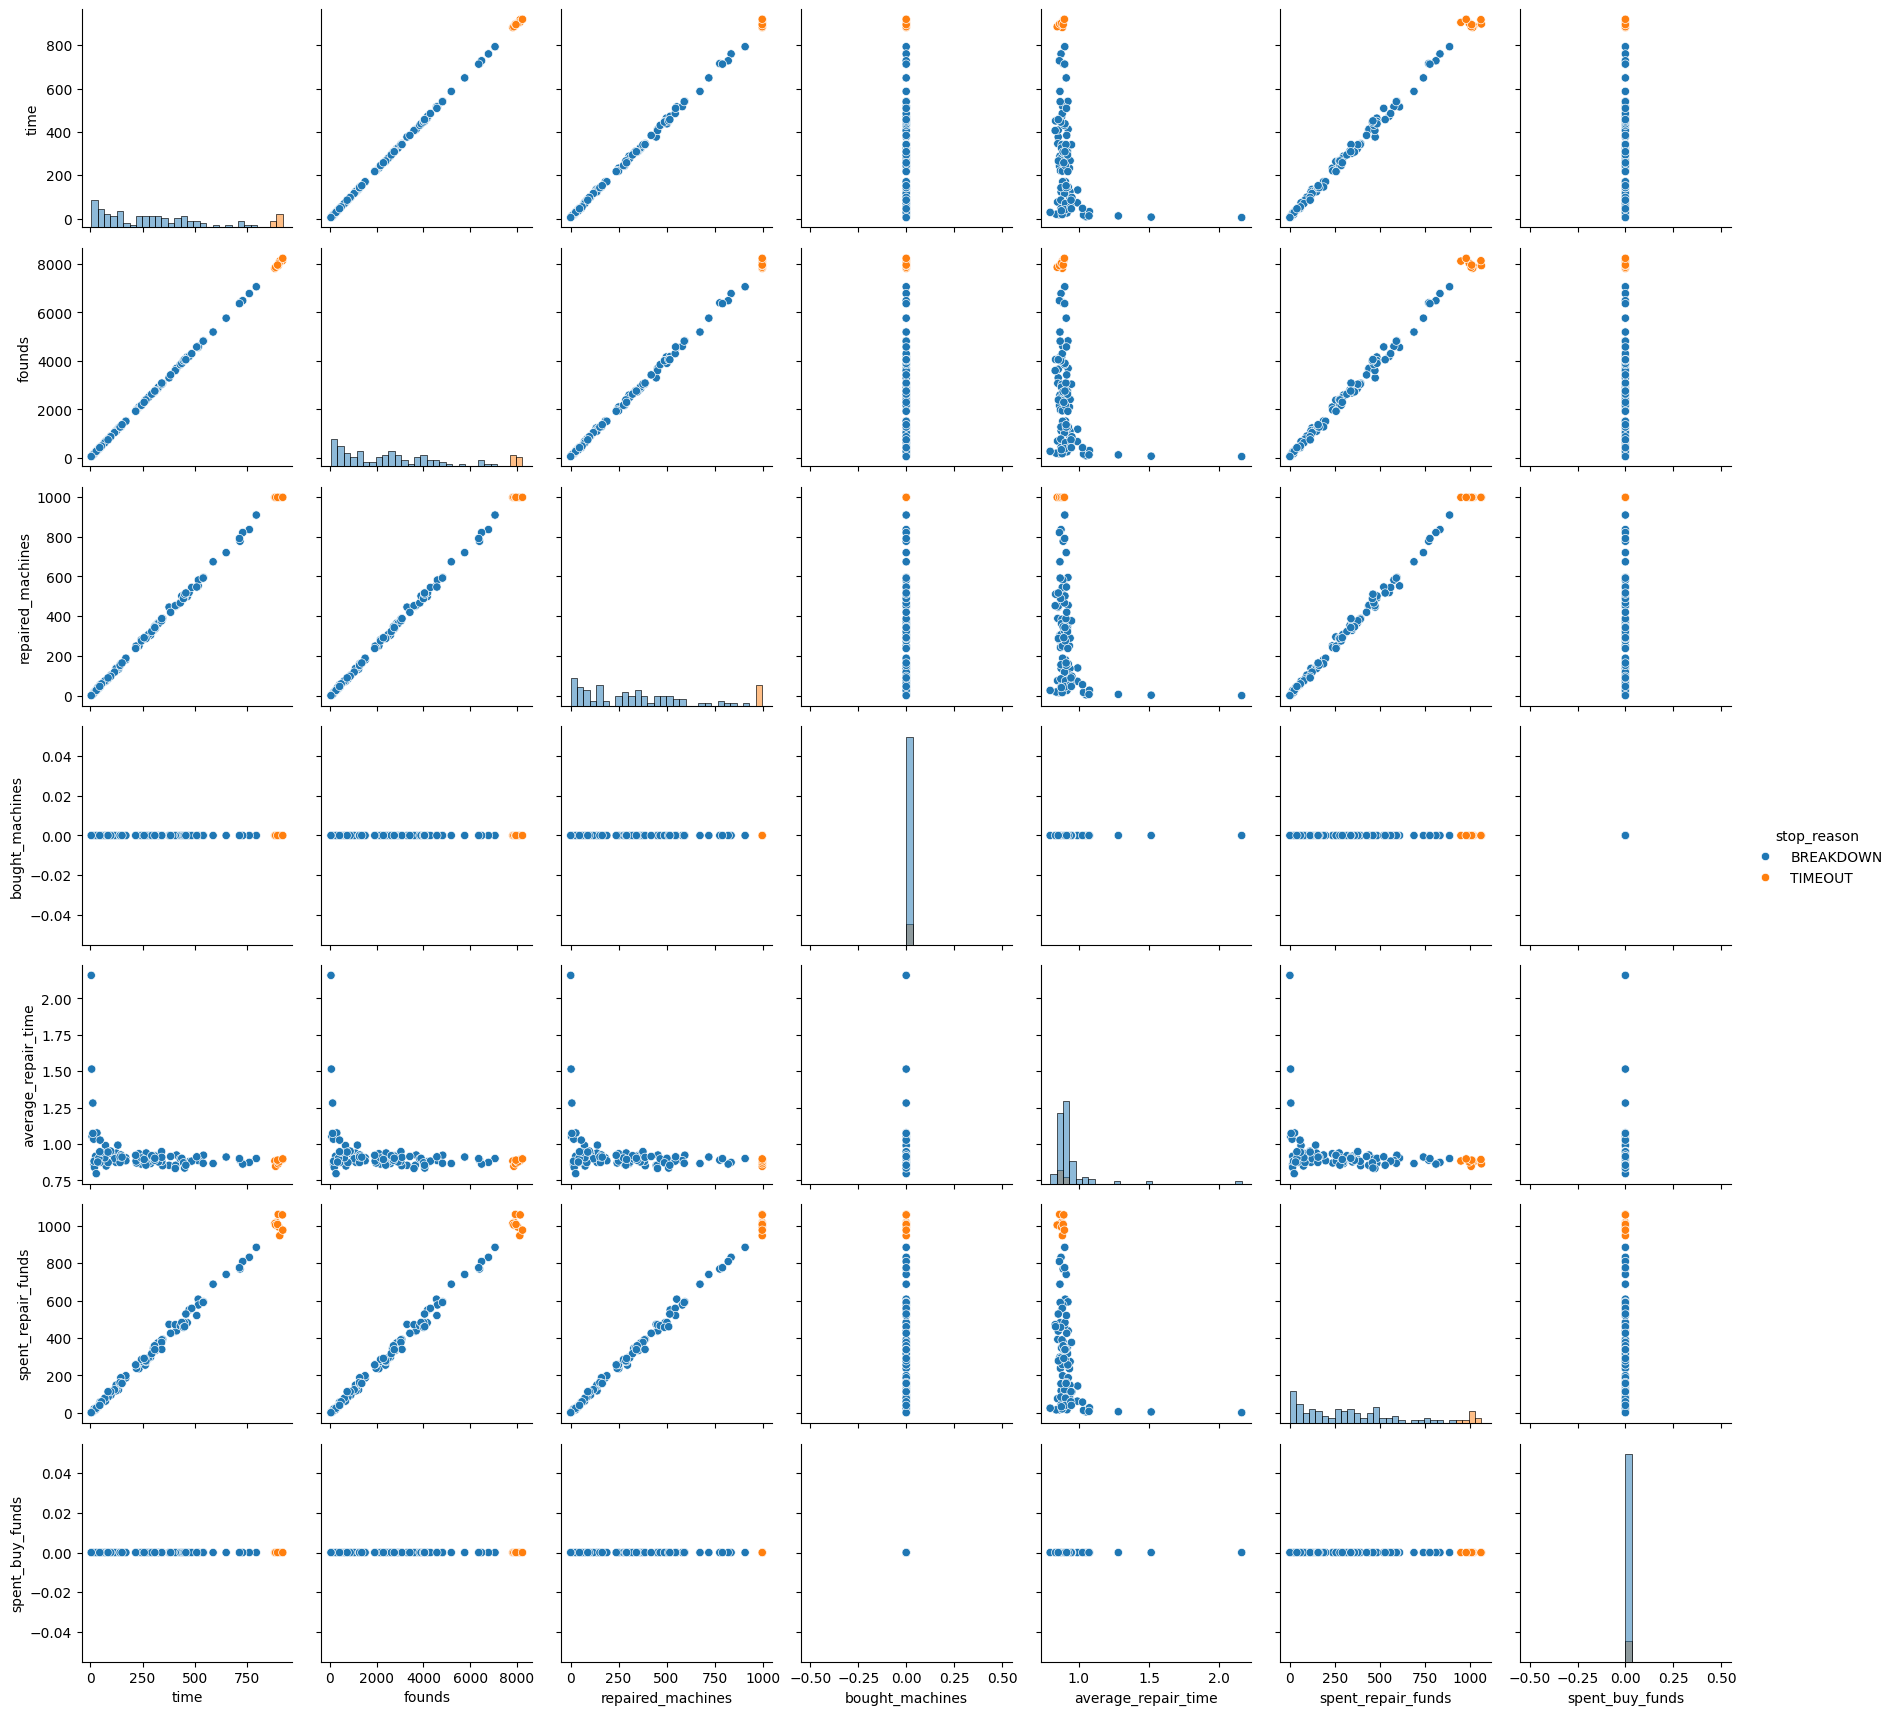

time       founds  repaired_machines  bought_machines  \
count  100.000000   100.000000         100.000000            100.0   
mean   318.055972  2839.655848         351.460000              0.0   
std    268.514905  2383.700890         299.818073              0.0   
min      4.657855    55.806196           1.000000              0.0   
25%     85.244264   770.662515          88.750000              0.0   
50%    272.875633  2454.875439         300.500000              0.0   
75%    452.546475  4053.457088         504.250000              0.0   
max    920.222400  8234.526106         998.000000              0.0   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000            100.0  
mean              0.925223          350.903872              0.0  
std               0.151296          302.197624              0.0  
min               0.796853            0.772358              0.0  
25%               0.874296           92.395934              0.0  
50%               0.897491          292.484435              0.0  
75%               0.923171          482.778641              0.0  
max               2.158652         1061.972140              0.0

In [38]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    0, # costo de compra
                    0, # tiempo de entrega
                    profit_function_ln, # funcion de ganancia
                    decition_function_id, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_1_3 = pd.DataFrame(results)

plot = sns.PairGrid(df_1_3, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_1_3.describe()

### 2 - Usar una funcion de decision lineal

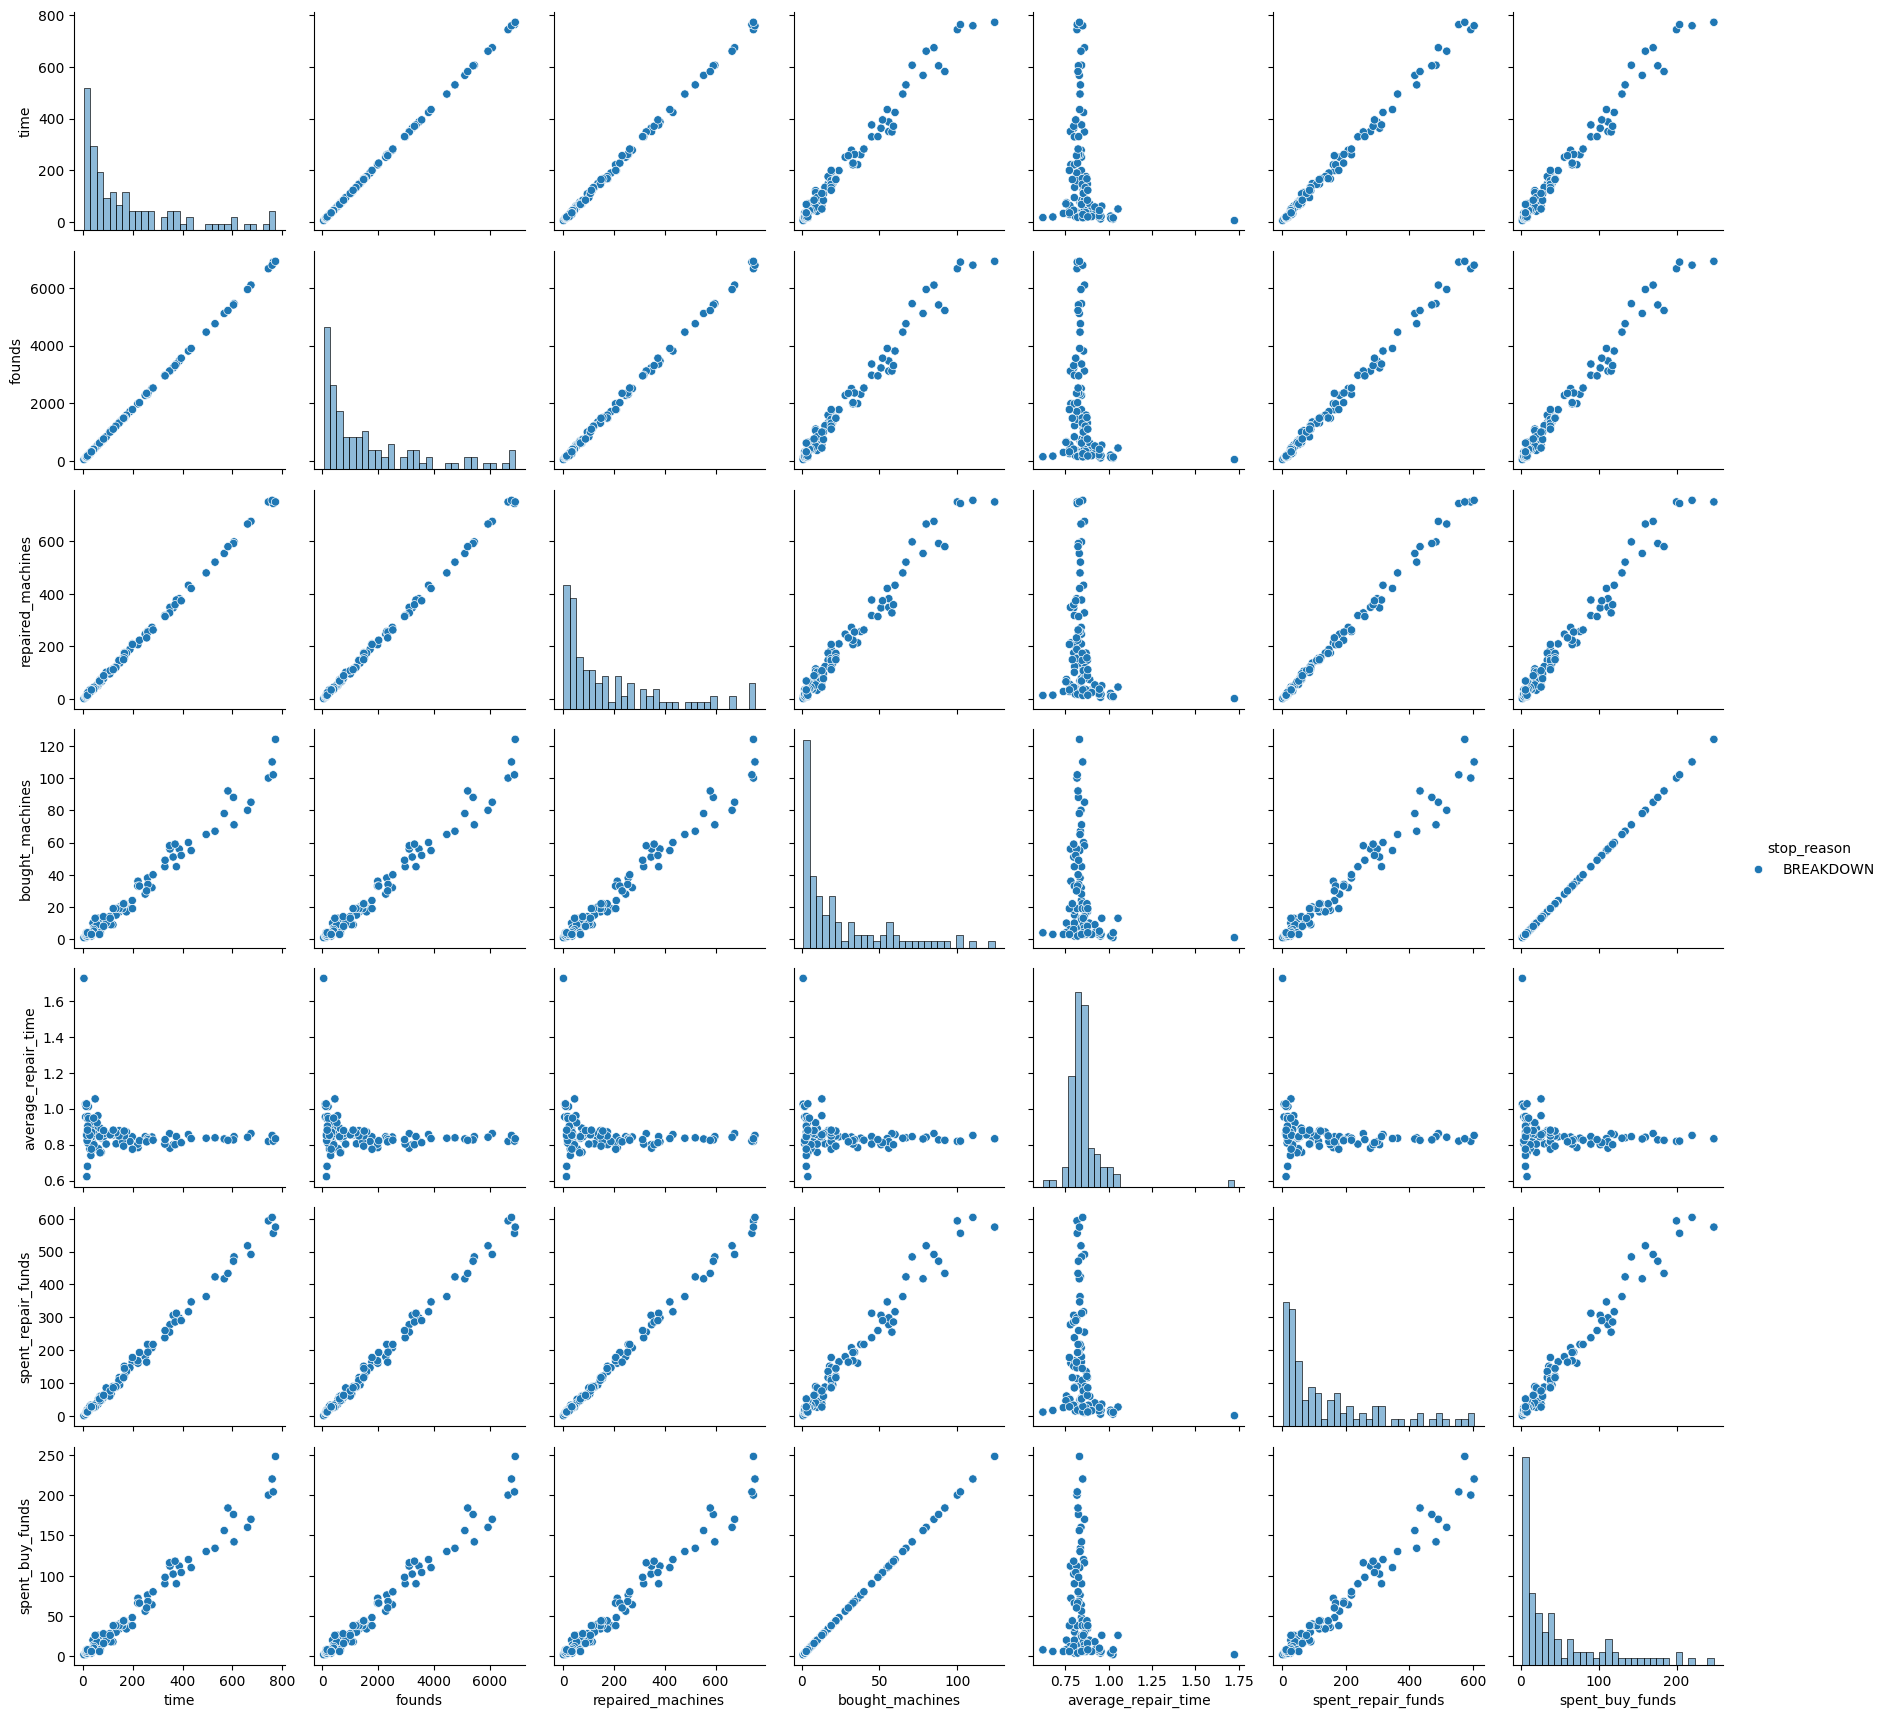

time       founds  repaired_machines  bought_machines  \
count  100.000000   100.000000         100.000000       100.000000   
mean   189.775220  1712.894733         184.410000        25.480000   
std    205.711414  1841.731964         203.647849        28.911037   
min      5.237844    59.697178           1.000000         1.000000   
25%     34.590489   324.299425          33.750000         4.000000   
50%    109.353939  1009.421808         103.000000        13.000000   
75%    265.357488  2399.408074         257.500000        36.500000   
max    772.359252  6911.233600         755.000000       124.000000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000       100.000000  
mean              0.855488          144.057470        50.960000  
std               0.109822          158.775281        57.822075  
min               0.621738            0.681260         2.000000  
25%               0.815672           25.848445         8.000000  
50%               0.841496           71.517667        26.000000  
75%               0.866486          209.803950        73.000000  
max               1.724645          603.846115       248.000000

In [39]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_ln, # funcion de ganancia
                    decition_function_ln, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_2_0 = pd.DataFrame(results)

plot = sns.PairGrid(df_2_0, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_2_0.describe()

#### 2.1 - Usar funcion de ganancia $sen(t) + 1$

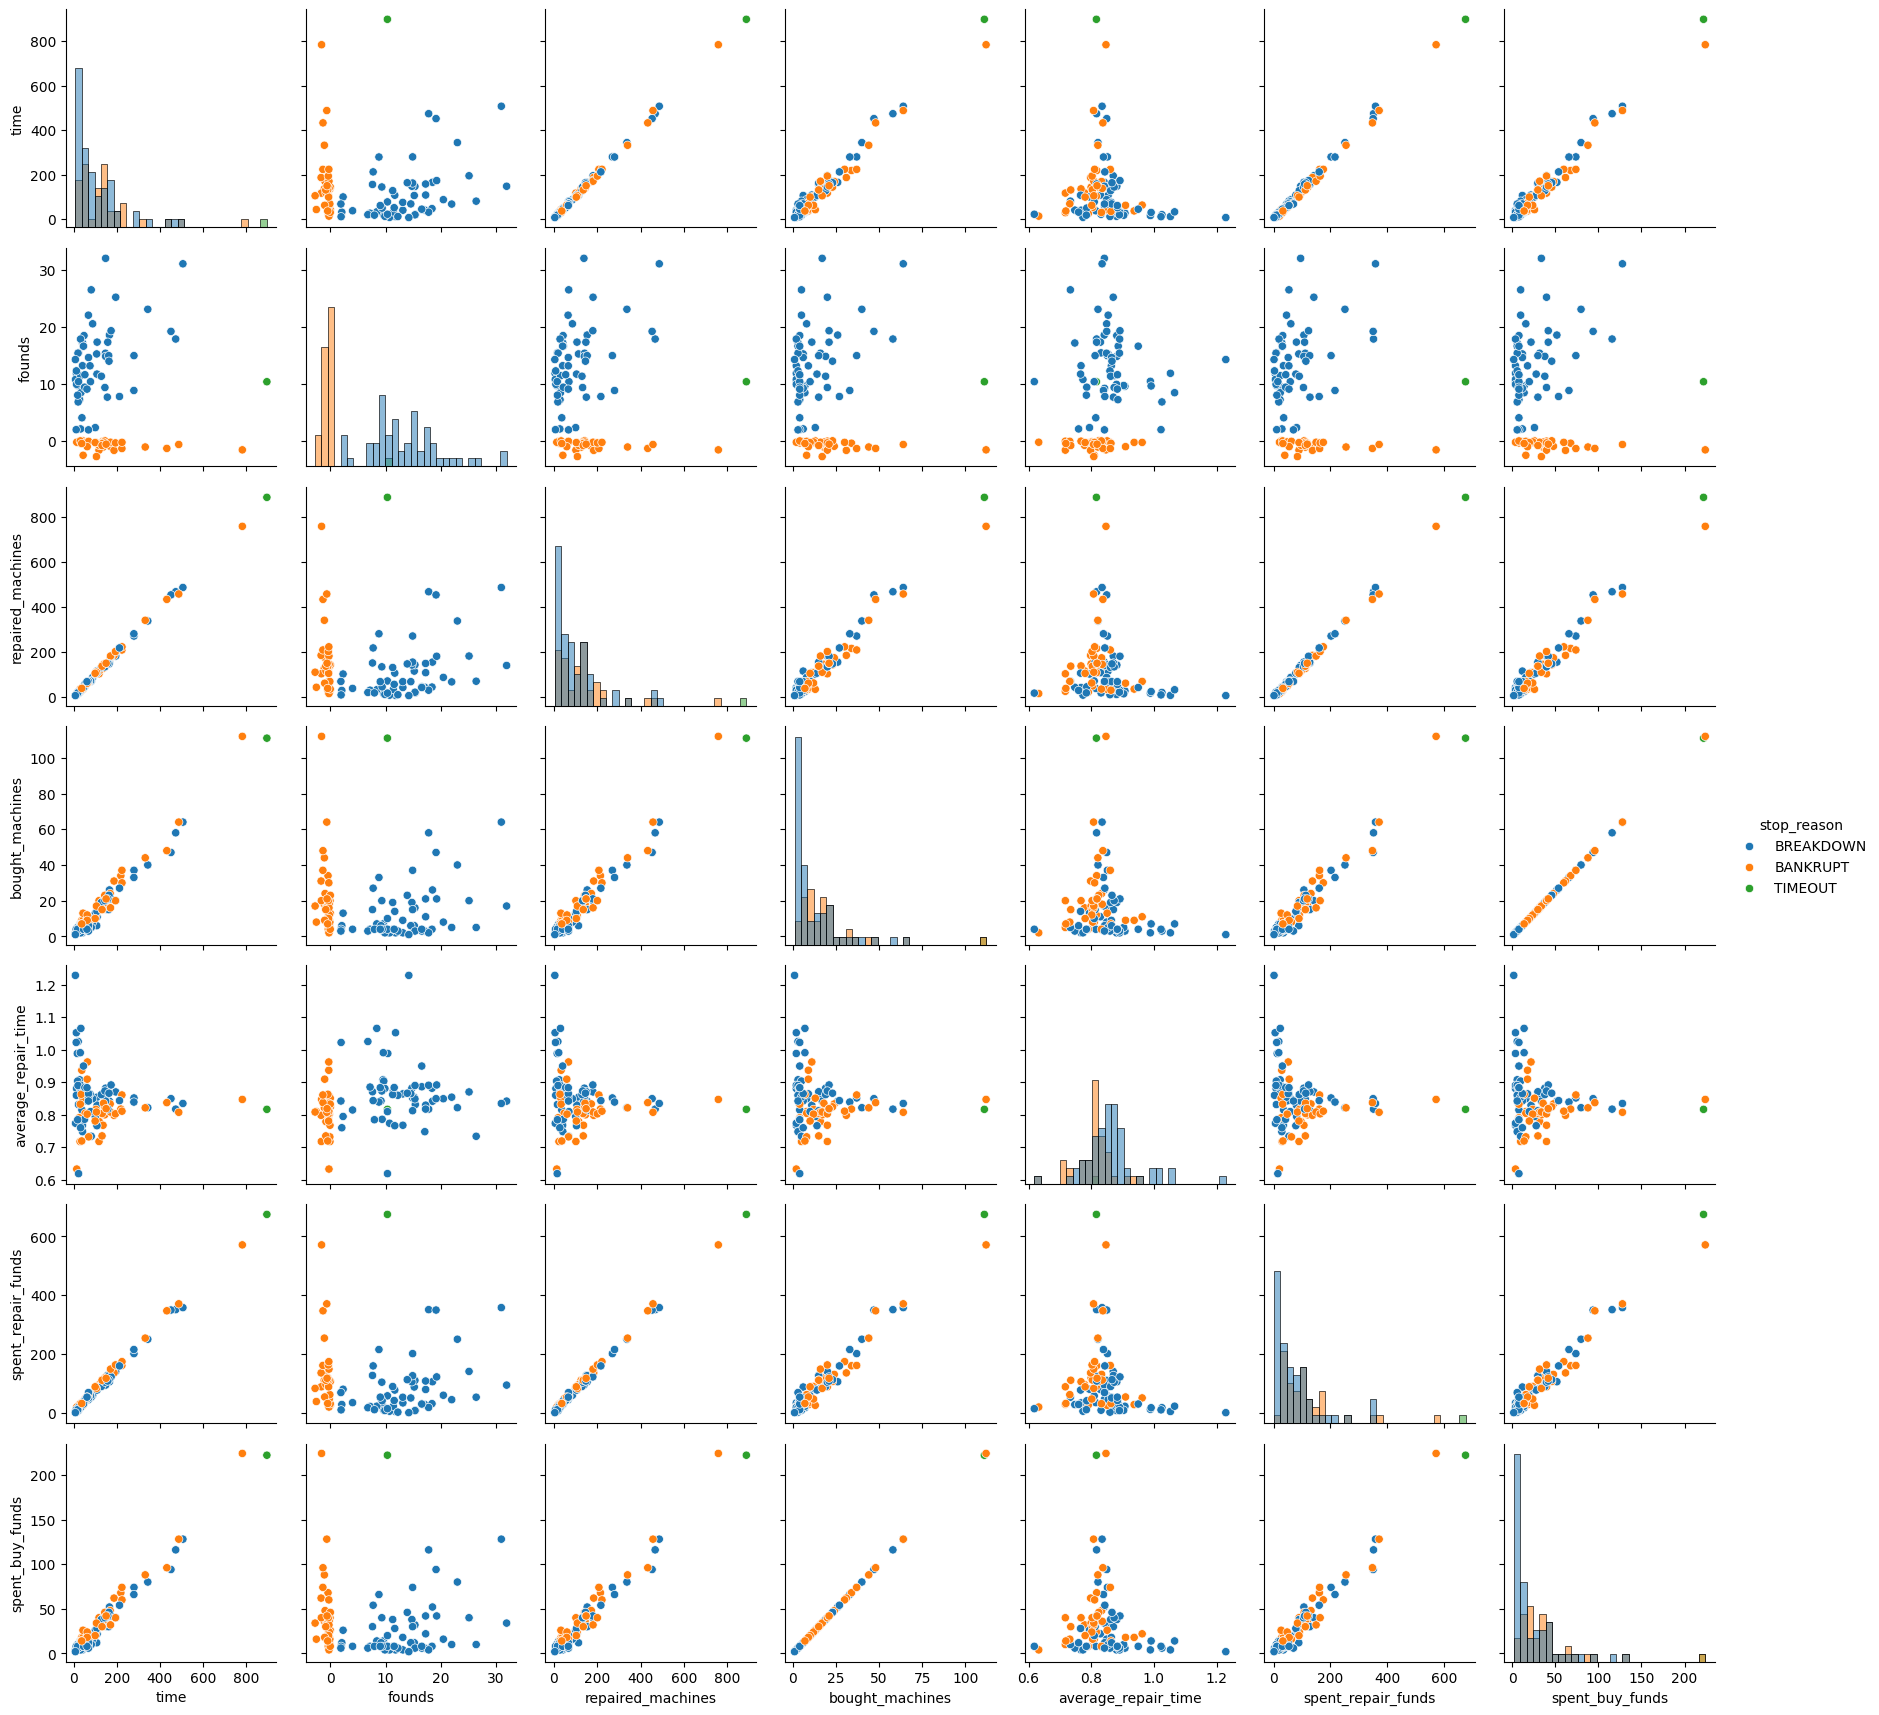

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000         100.000000       100.000000   
mean   129.508474    7.890888         125.850000        16.470000   
std    150.408057    8.500417         147.825817        19.346628   
min      7.853050   -2.771841           5.000000         1.000000   
25%     36.823533   -0.296339          33.750000         4.000000   
50%     79.857406    8.613046          69.500000        10.000000   
75%    157.001423   14.637320         148.250000        20.000000   
max    898.235146   31.965505         887.000000       112.000000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000       100.000000  
mean              0.842648           98.557546        32.940000  
std               0.083165          112.128558        38.693256  
min               0.618285            1.624411         2.000000  
25%               0.804113           29.786773         8.000000  
50%               0.836125           61.791772        20.000000  
75%               0.871223          114.797989        40.000000  
max               1.229407          674.926964       224.000000

In [40]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_sn_lg, # funcion de ganancia
                    decition_function_ln, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_2_1 = pd.DataFrame(results)

plot = sns.PairGrid(df_2_1, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_2_1.describe()

### 3 - Usando la funcion de ganancia sn_lg probar las funciones de decision cuadraticas

#### 3.0 - Funcion de decision lineal

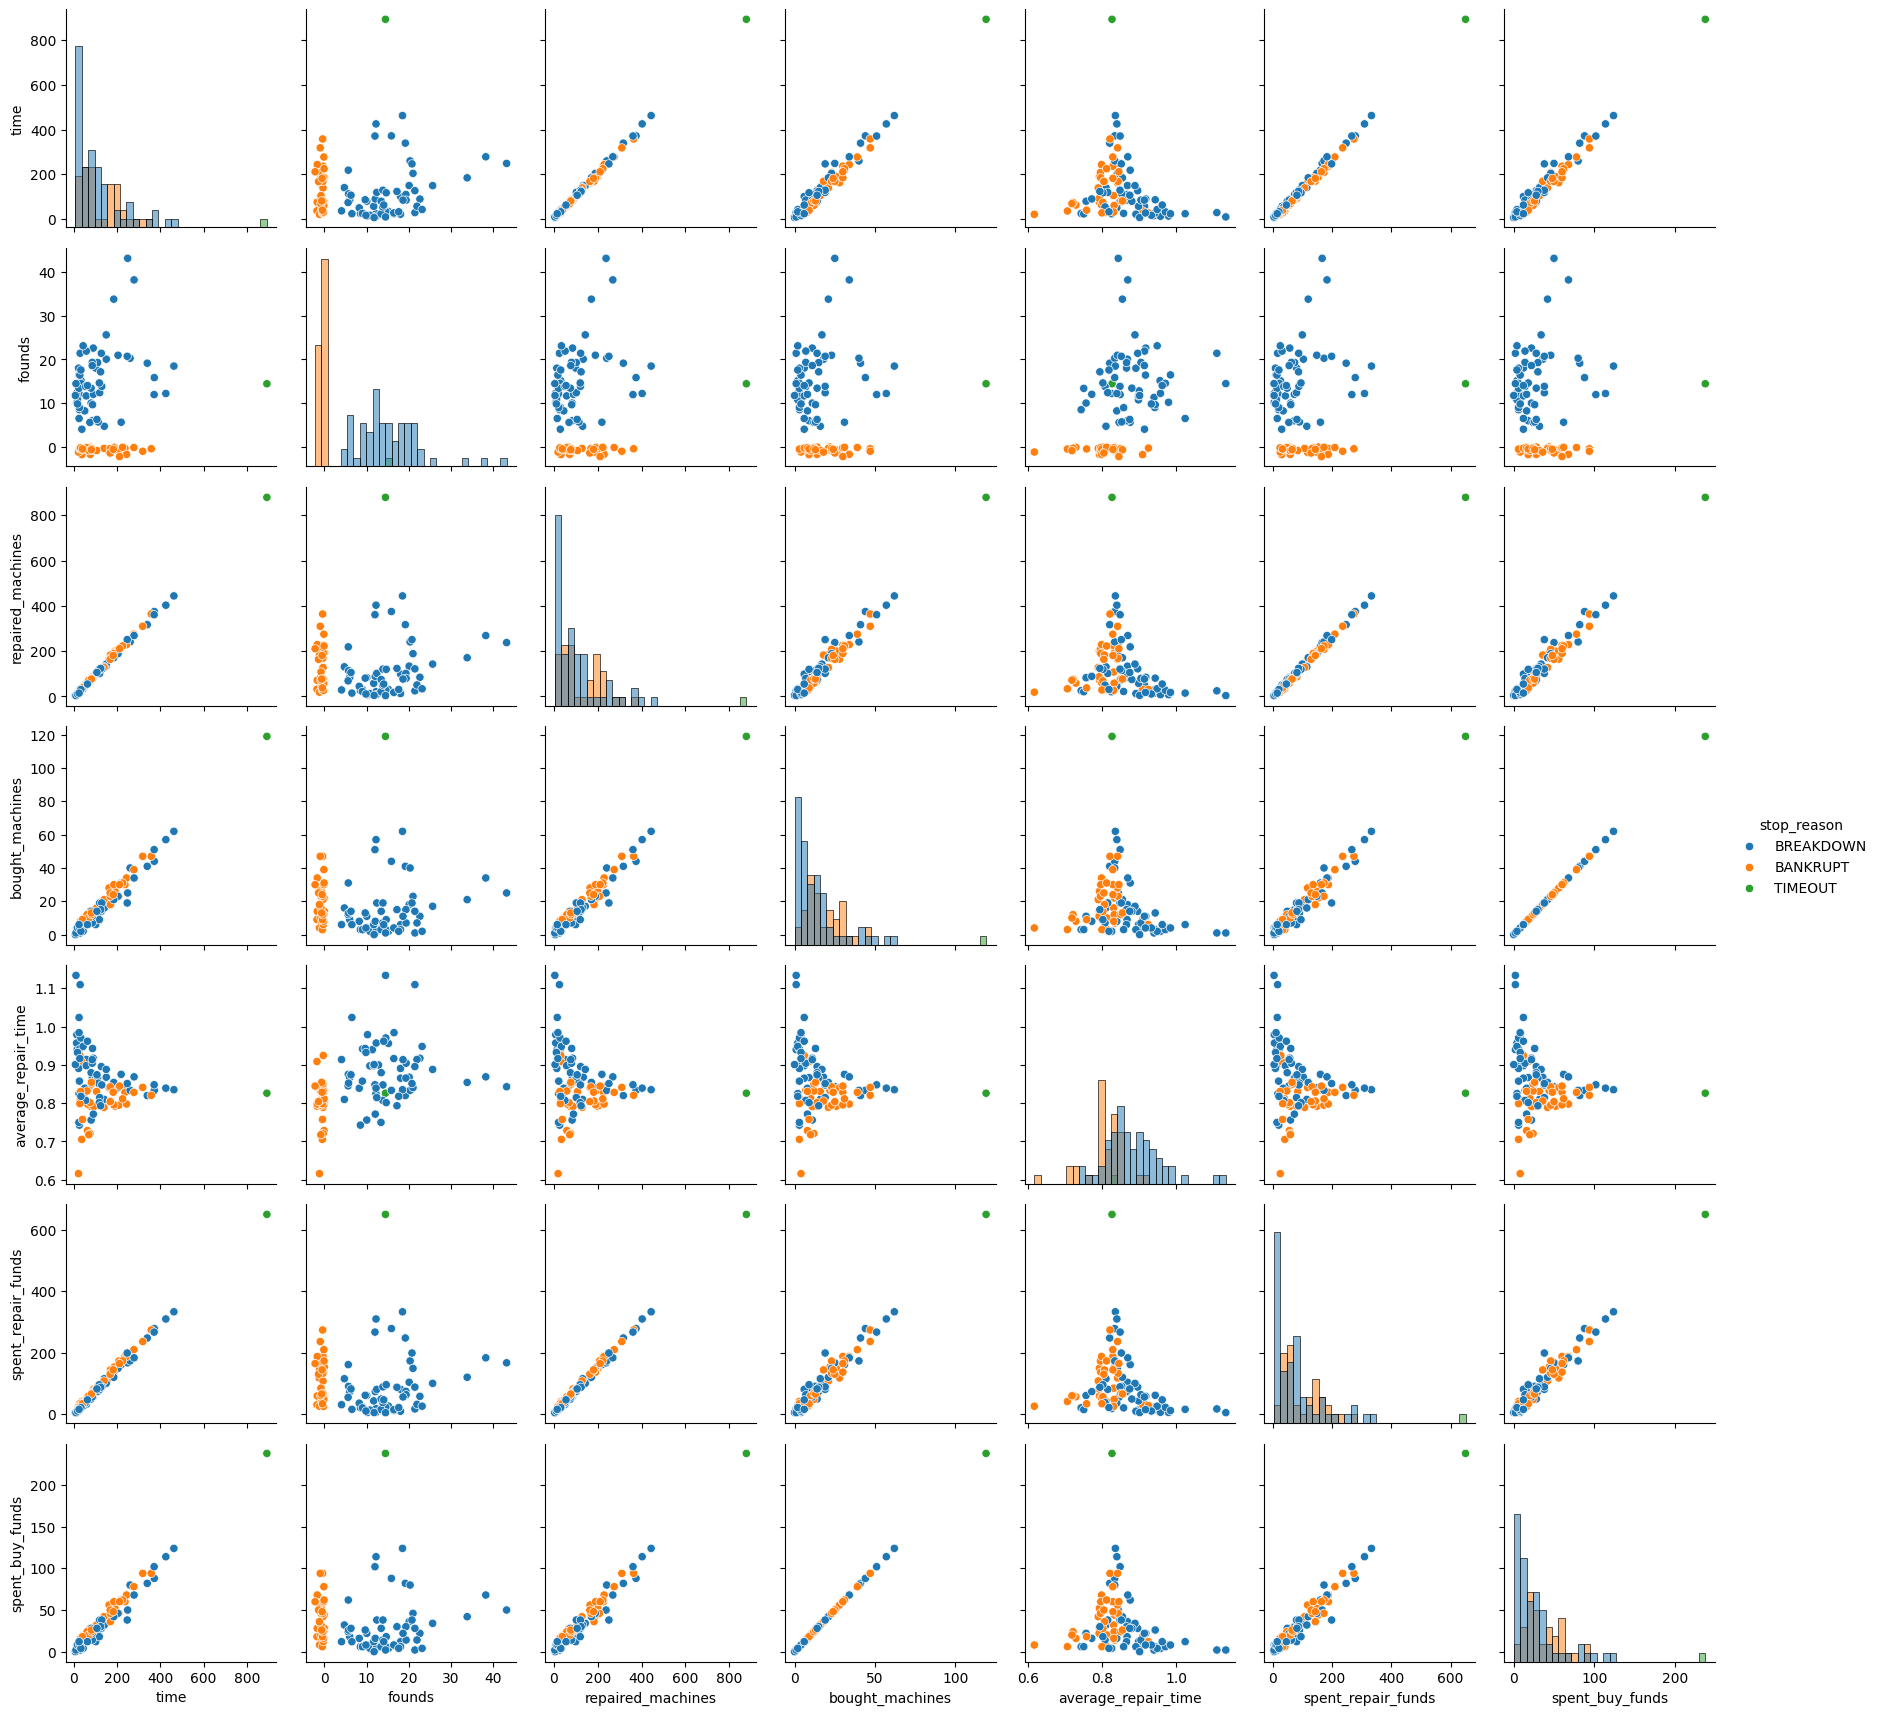

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000          100.00000       100.000000   
mean   123.971880    9.159430          119.61000        16.300000   
std    128.385867    9.680093          126.57444        17.014848   
min      6.986132   -2.184264            4.00000         0.000000   
25%     33.622487   -0.326908           31.00000         5.500000   
50%     83.274470    9.349812           79.00000        11.500000   
75%    172.428151   15.340837          173.50000        22.250000   
max    893.225708   43.119992          879.00000       119.000000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000       100.000000  
mean              0.852527           92.261769        32.600000  
std               0.076635           94.165668        34.029696  
min               0.616123            4.204804         0.000000  
25%               0.808348           29.300716        11.000000  
50%               0.840980           60.436581        23.000000  
75%               0.897426          133.390672        44.500000  
max               1.133425          650.240273       238.000000

In [41]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_sn_lg, # funcion de ganancia
                    decition_function_ln, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_3_1 = pd.DataFrame(results)

plot = sns.PairGrid(df_3_1, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_3_1.describe()

#### 3.1 - Funcion de decision random (uniforme ~ {0, 1})

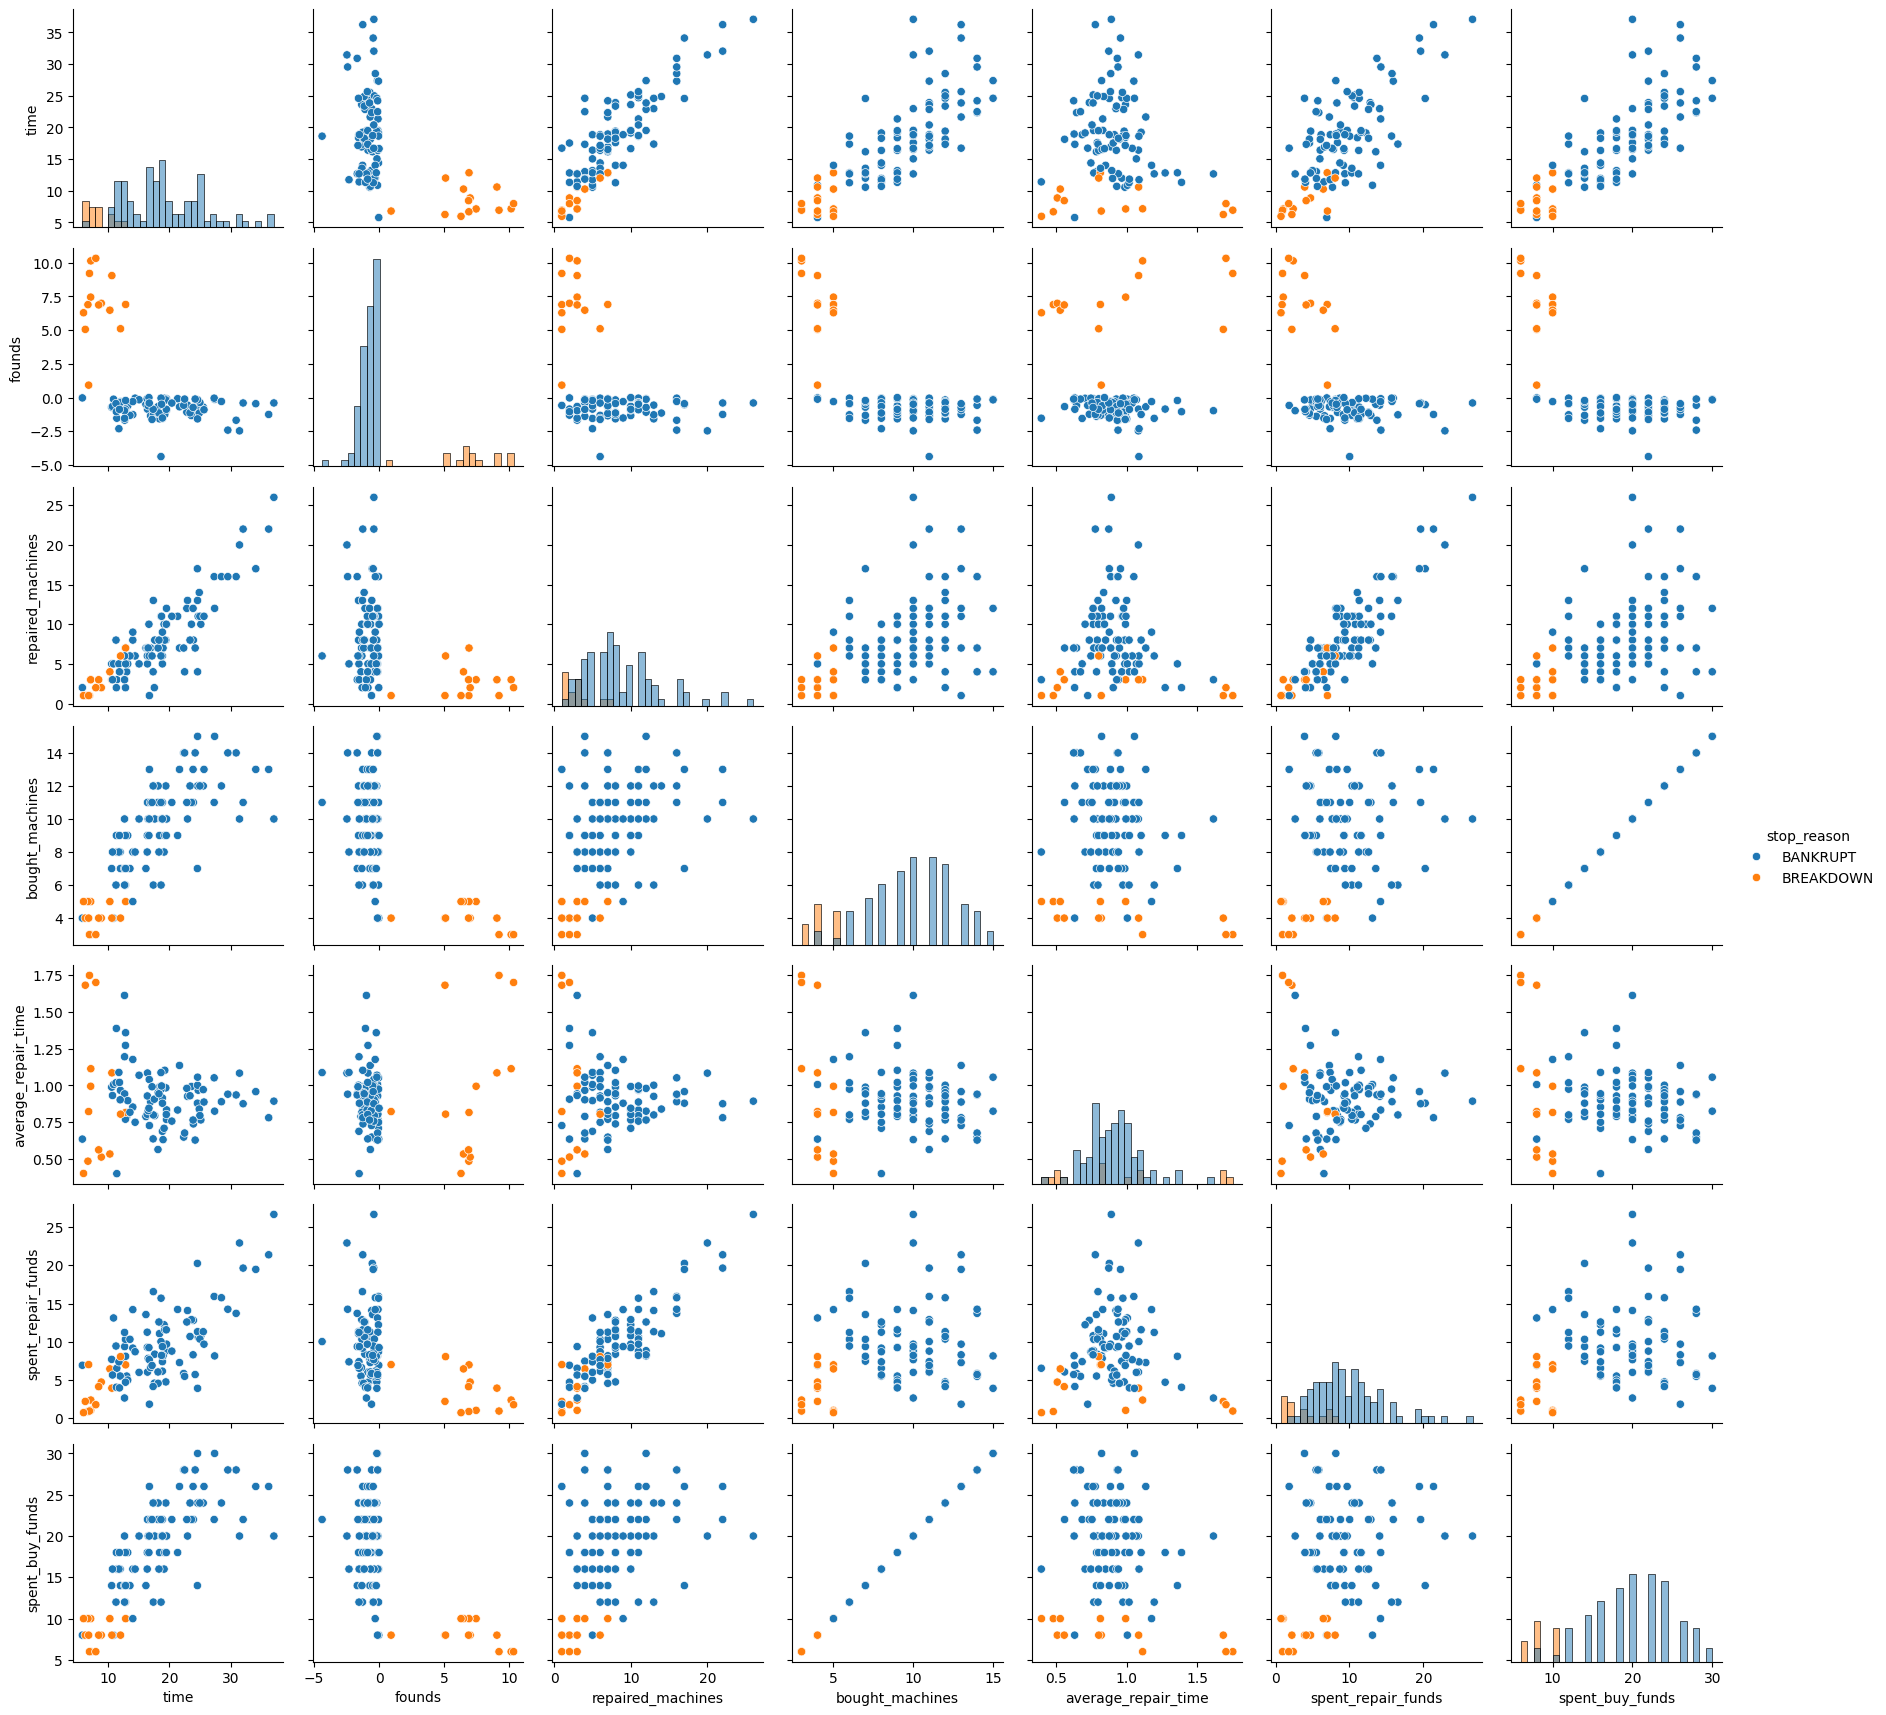

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000           100.0000       100.000000   
mean    17.802126    0.267342             7.7900         9.160000   
std      7.034290    2.929991             5.0298         3.096821   
min      5.777882   -4.379225             1.0000         3.000000   
25%     12.672768   -1.146904             4.0000         7.000000   
50%     17.457132   -0.567873             7.0000        10.000000   
75%     22.878232   -0.113106            11.0000        11.250000   
max     37.069378   10.328565            26.0000        15.000000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000       100.000000  
mean              0.913654            9.021385        18.320000  
std               0.241425            4.934747         6.193643  
min               0.398979            0.730312         6.000000  
25%               0.788450            5.700472        14.000000  
50%               0.899124            8.260061        20.000000  
75%               0.997500           11.319034        22.500000  
max               1.749445           26.663122        30.000000

In [42]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_sn_lg, # funcion de ganancia
                    decition_function_dummy, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_3_1 = pd.DataFrame(results)

plot = sns.PairGrid(df_3_1, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_3_1.describe()

#### 3.2 - Funcion de decision cuadratica que prioriza el tiempo

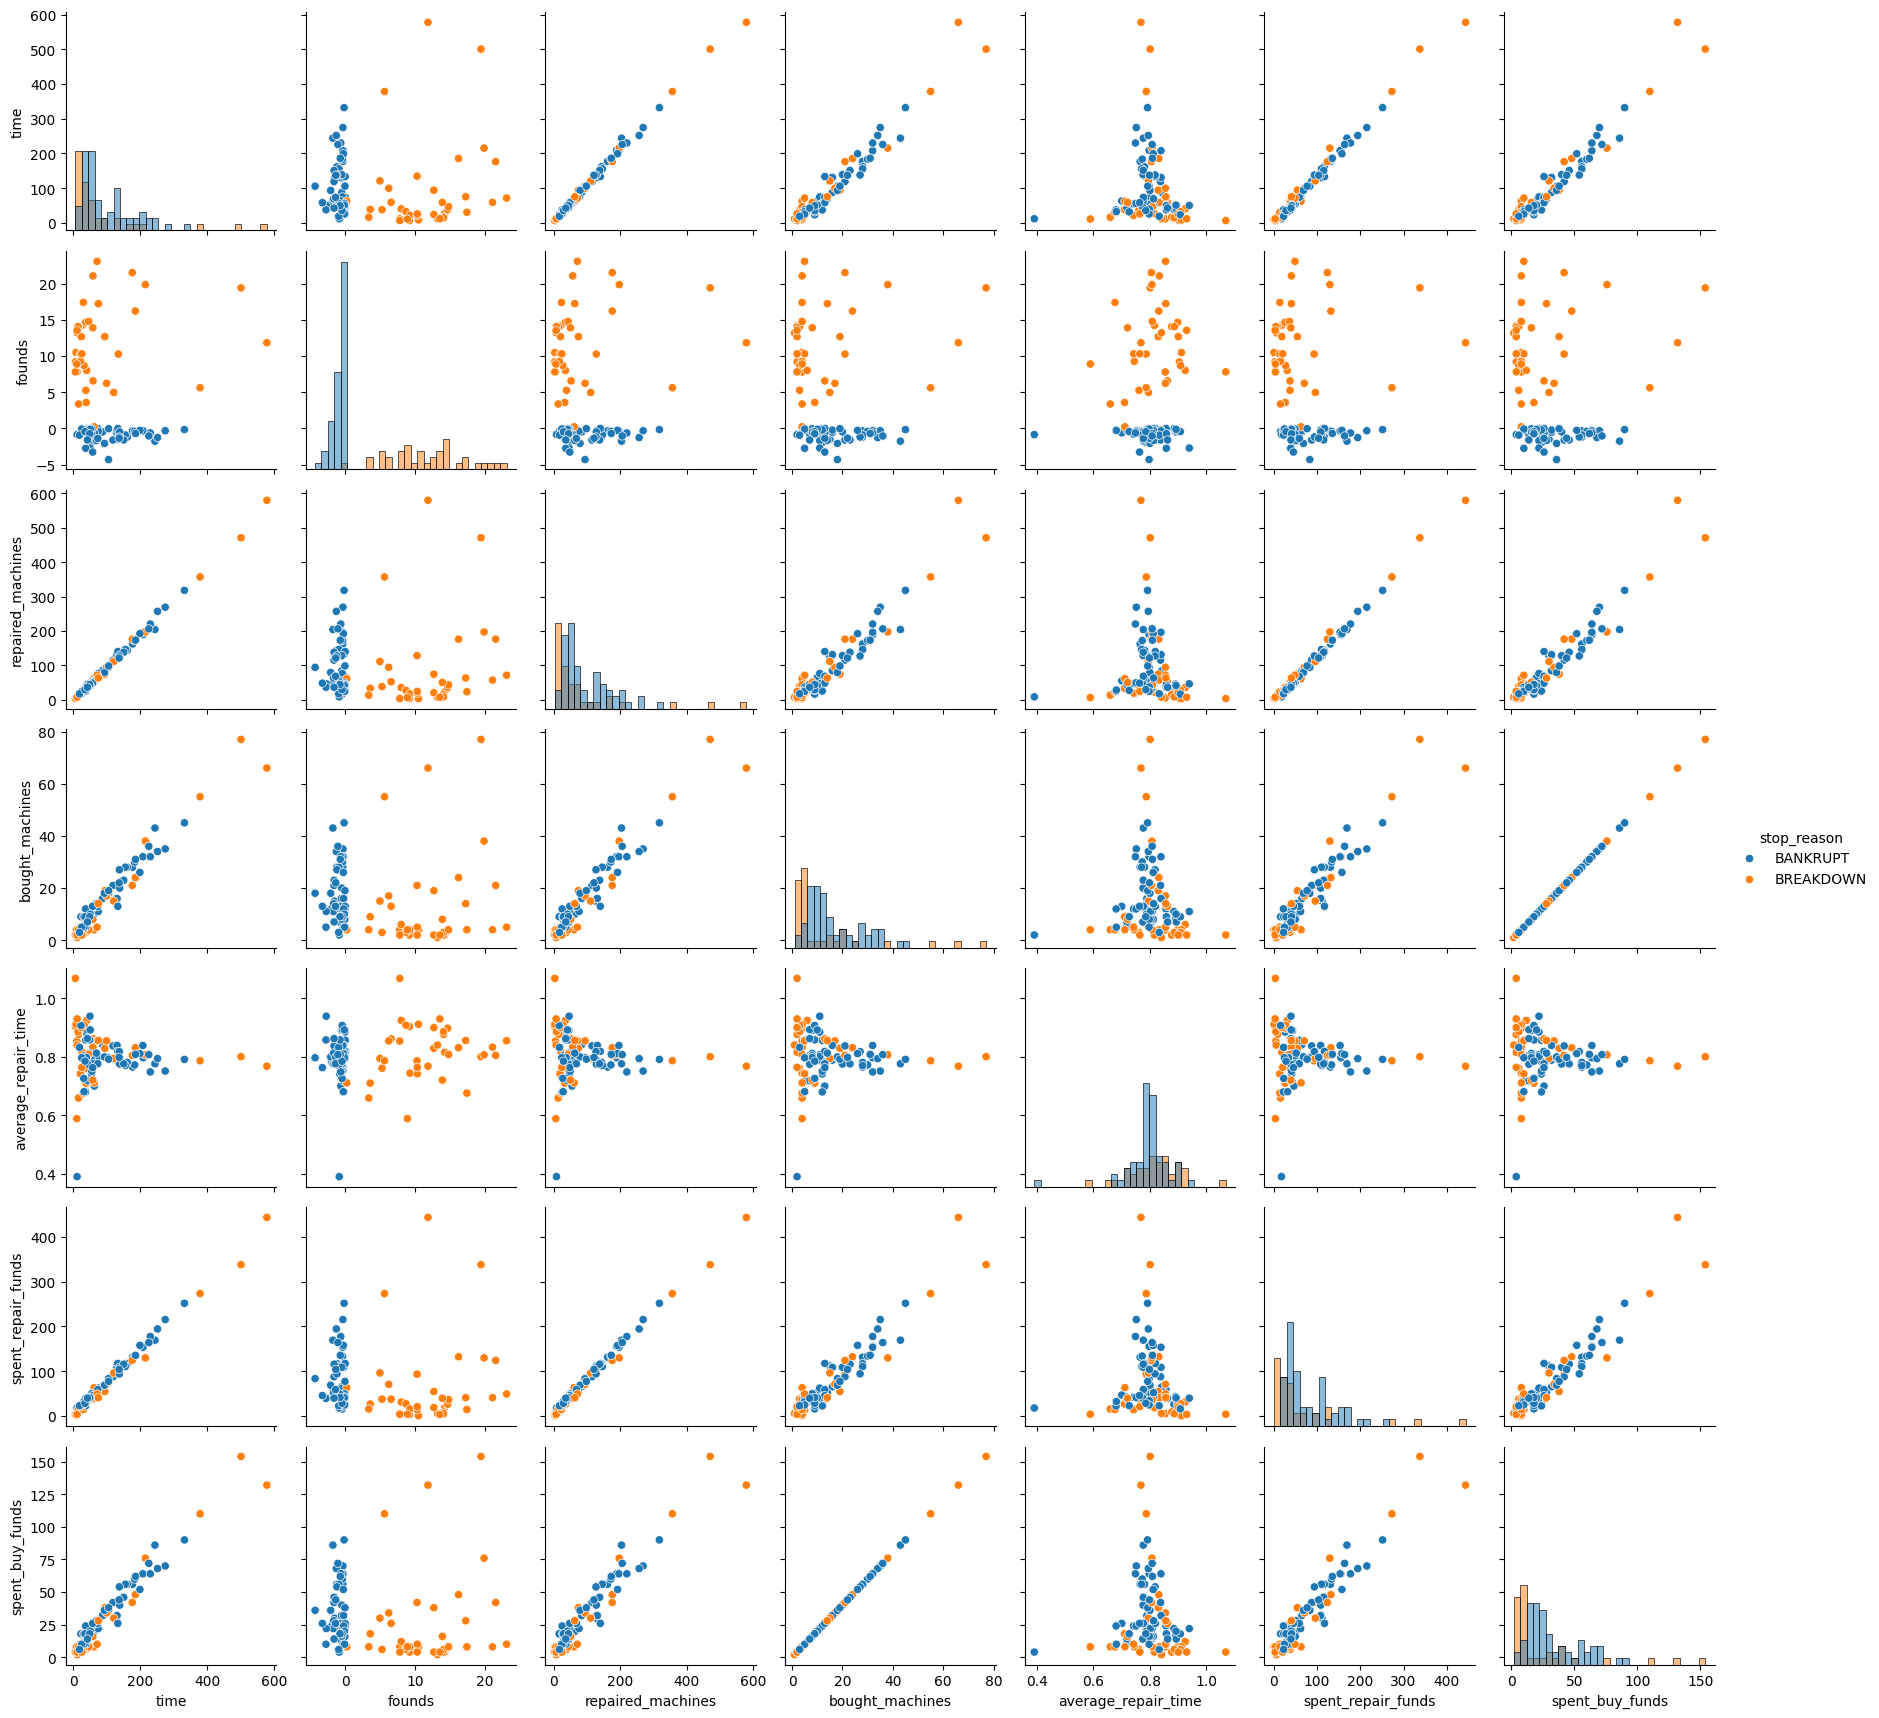

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000         100.000000       100.000000   
mean    96.721298    3.894266          89.600000        14.940000   
std     99.196256    6.990841          96.444991        13.836579   
min      6.774238   -4.310967           3.000000         1.000000   
25%     37.300108   -0.752724          28.750000         5.000000   
50%     58.601977   -0.247504          51.000000        11.000000   
75%    133.802952    8.979185         128.000000        20.250000   
max    577.937975   23.115728         580.000000        77.000000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000       100.000000  
mean              0.802741           72.844417        29.880000  
std               0.080199           72.626024        27.673157  
min               0.390317            0.947370         2.000000  
25%               0.772167           27.389785        10.000000  
50%               0.801022           43.364072        22.000000  
75%               0.844885          108.682764        40.500000  
max               1.068810          443.093116       154.000000

In [43]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_sn_lg, # funcion de ganancia
                    decition_function_sq_time, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_3_2 = pd.DataFrame(results)

plot = sns.PairGrid(df_3_2, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_3_2.describe()

#### 3.3 - Funcion de decision cuadratica que prioriza el costo

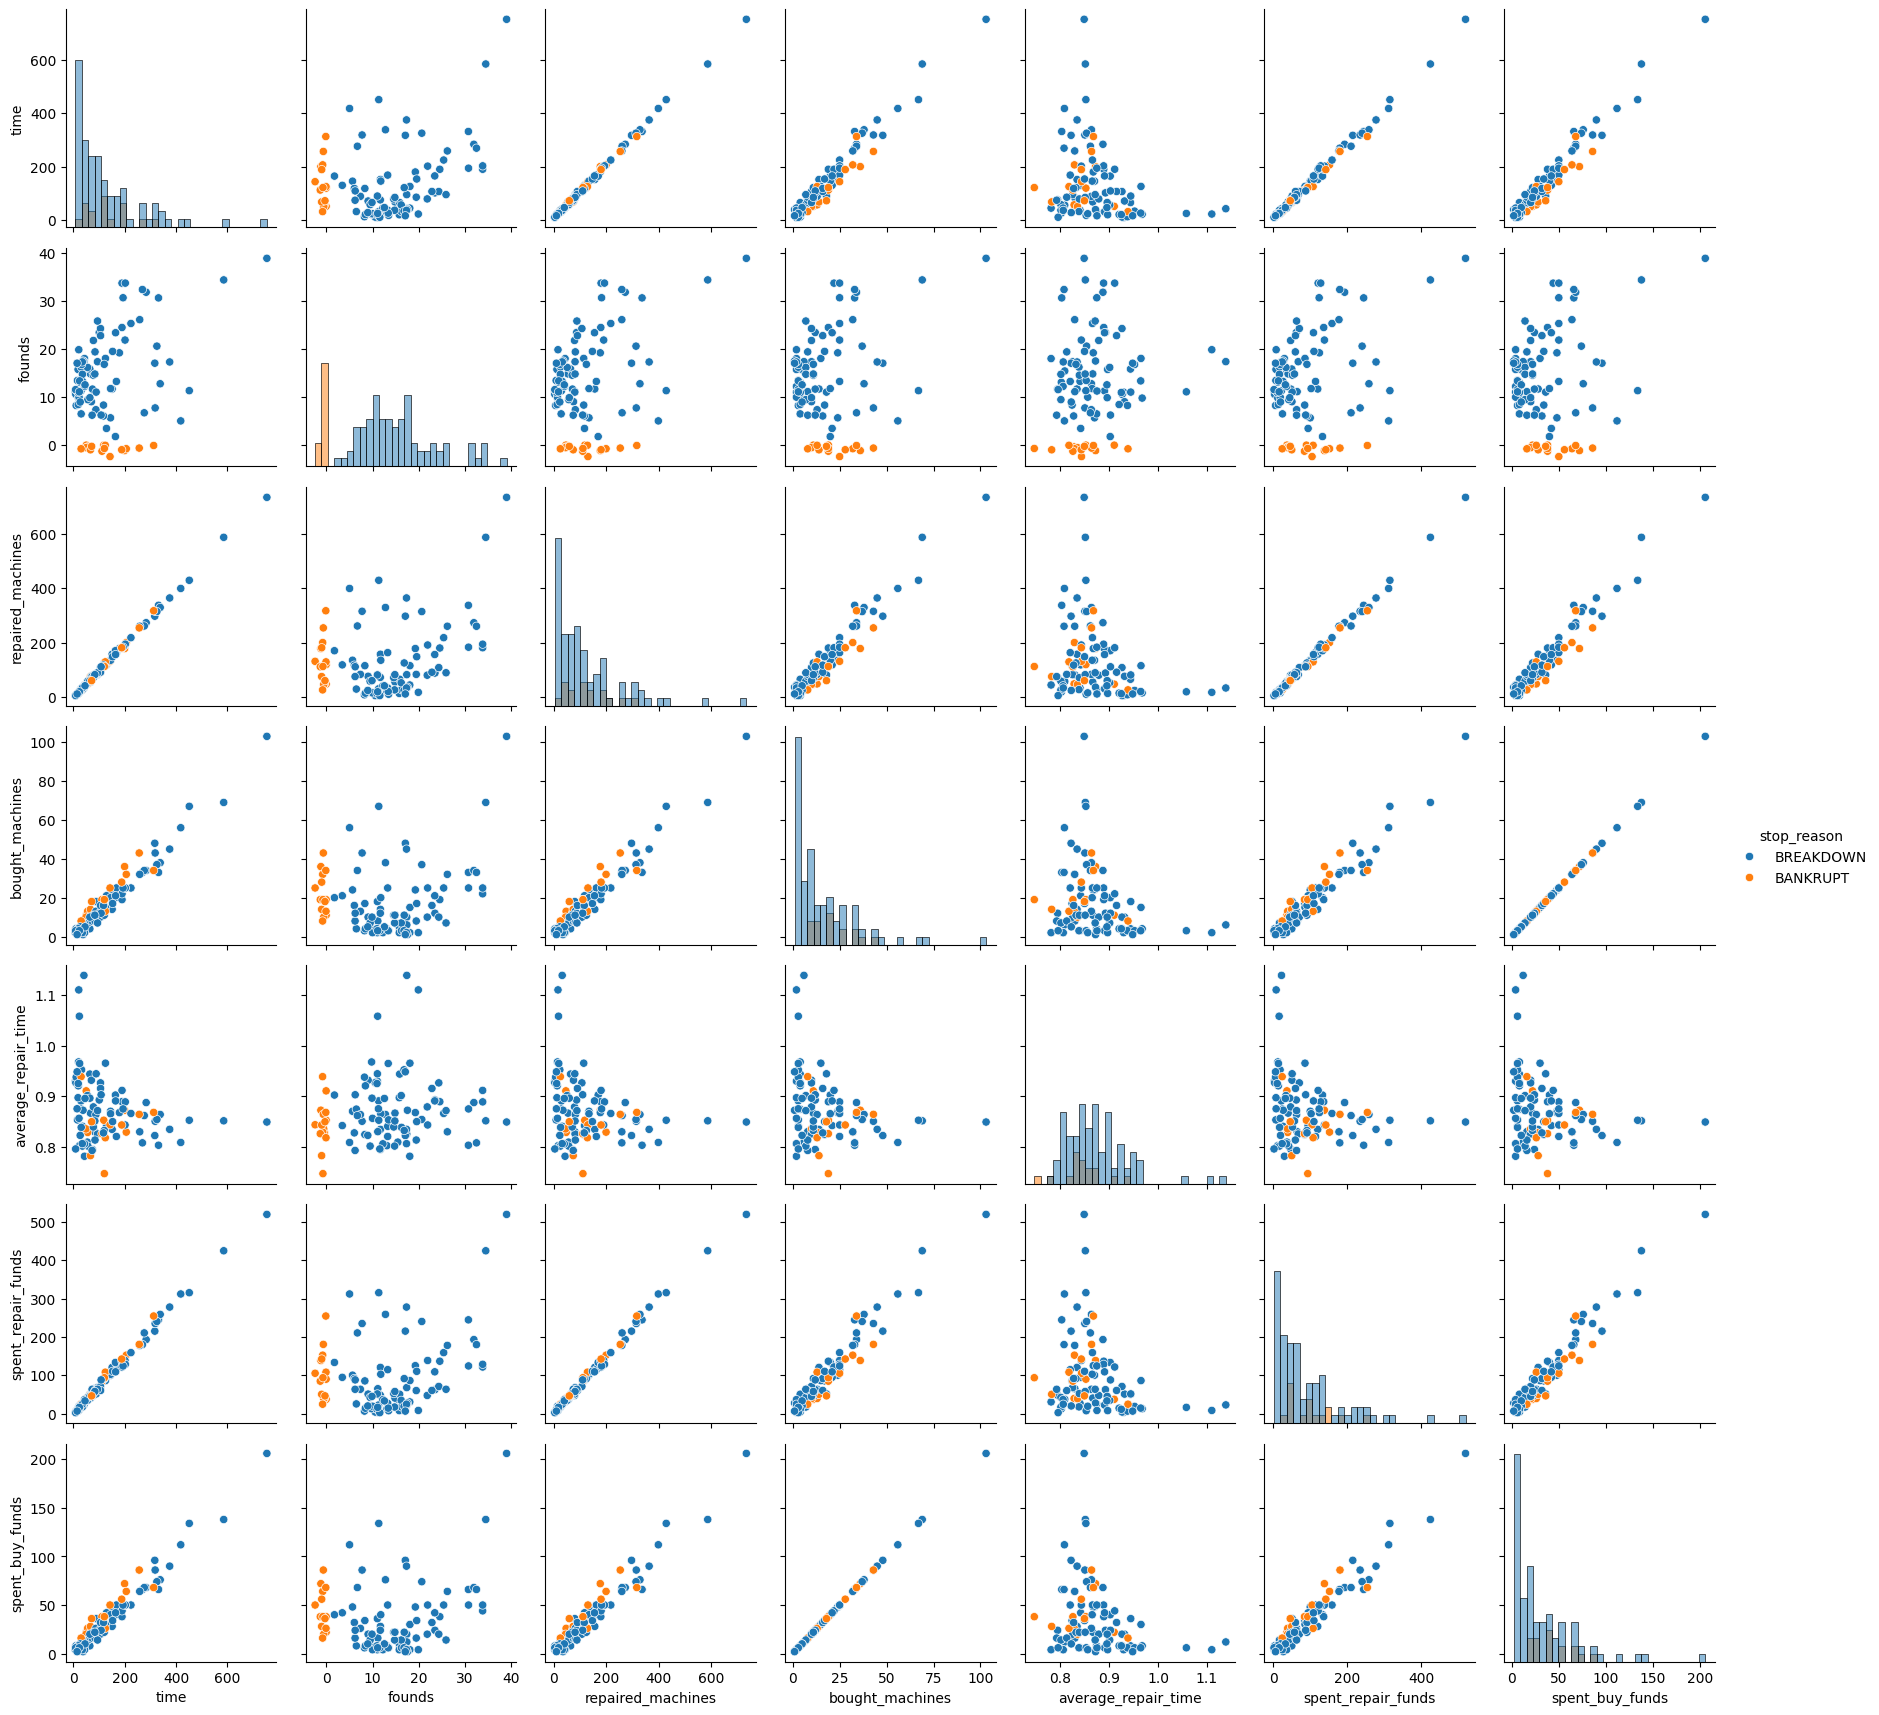

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000         100.000000        100.00000   
mean   130.242705   13.179010         124.910000         17.14000   
std    128.437020    9.476440         126.380306         16.83192   
min      8.200443   -2.429945           5.000000          1.00000   
25%     37.516182    7.194317          33.000000          4.00000   
50%     88.543456   12.386001          82.500000         12.00000   
75%    181.815227   17.650955         178.000000         24.25000   
max    753.716208   38.965026         734.000000        103.00000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000        100.00000  
mean              0.868904           92.836864         34.28000  
std               0.062640           92.757466         33.66384  
min               0.746251            2.669308          2.00000  
25%               0.828383           26.510724          8.00000  
50%               0.858584           63.167458         24.00000  
75%               0.896034          124.691162         48.50000  
max               1.139113          519.786359        206.00000

In [44]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_sn_lg, # funcion de ganancia
                    decition_function_sq_cost, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_3_3 = pd.DataFrame(results)

plot = sns.PairGrid(df_3_3, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_3_3.describe()

#### 3.4 - Funcion de decision cuadratica que prioriza el producto del tiempo y el costo

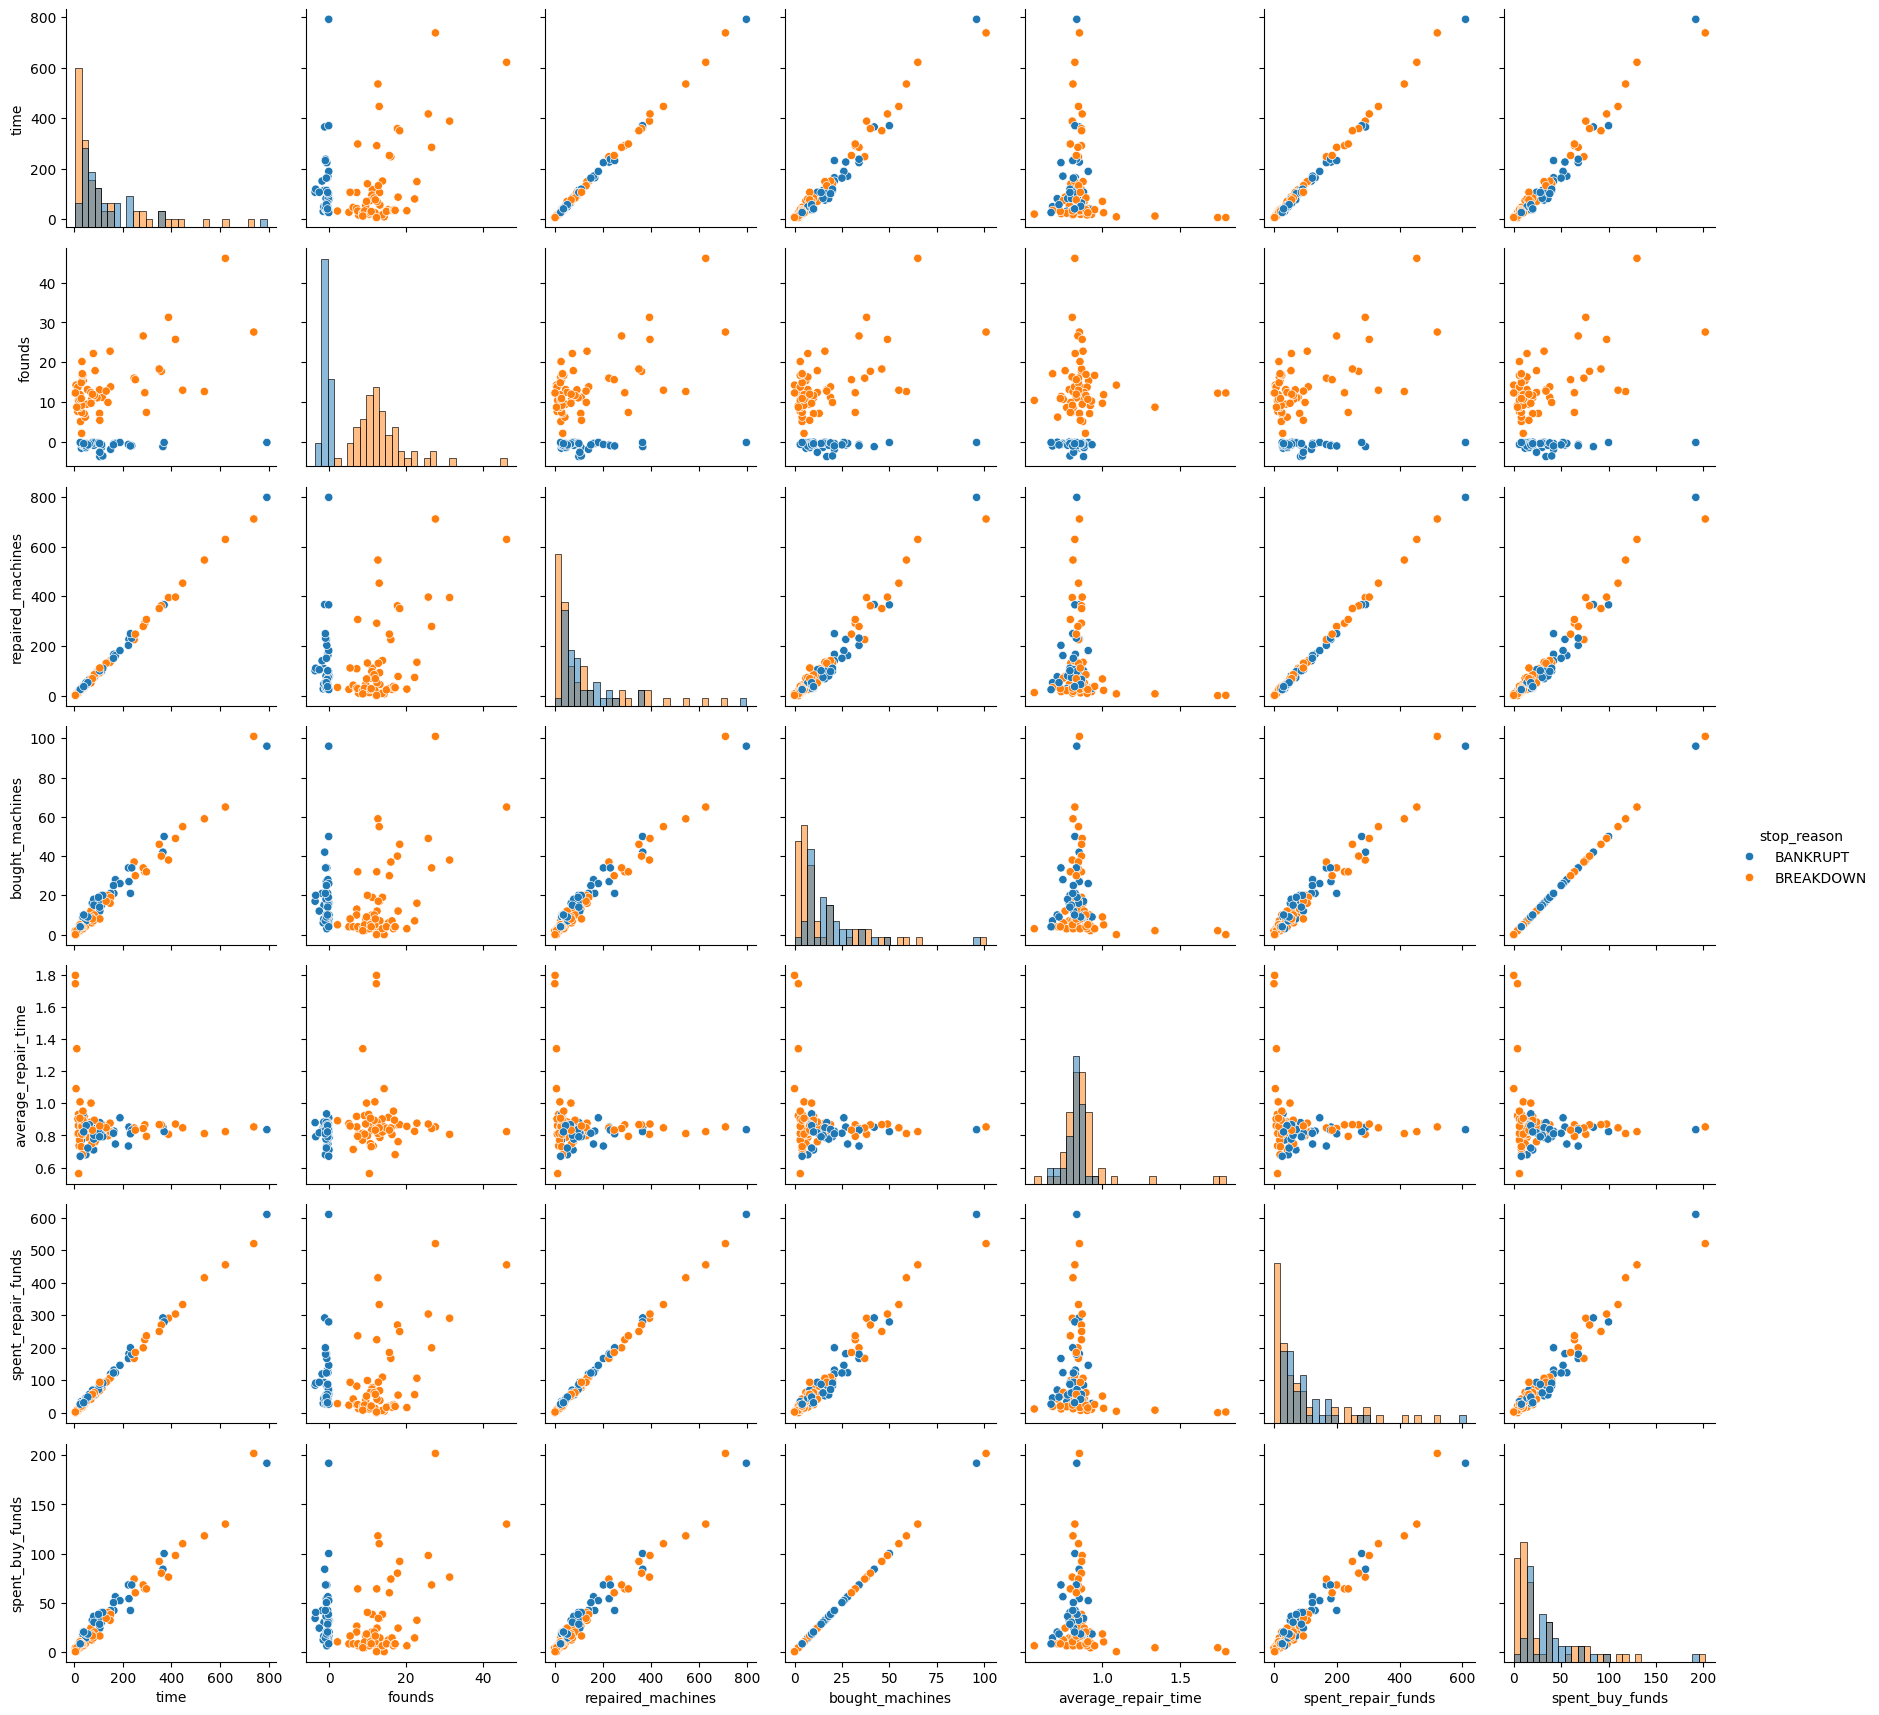

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000          100.00000       100.000000   
mean   129.028217    7.965558          125.56000        16.930000   
std    153.081571    9.024533          153.68013        18.296798   
min      5.569524   -3.627531            1.00000         0.000000   
25%     32.485953   -0.366762           29.00000         5.000000   
50%     75.989045    8.670761           72.00000        10.000000   
75%    150.398313   13.032098          141.25000        20.250000   
max    792.392828   46.063439          798.00000       101.000000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000       100.000000  
mean              0.858039           97.120791        33.860000  
std               0.157437          114.512140        36.593597  
min               0.562914            0.550353         0.000000  
25%               0.806884           25.132108        10.000000  
50%               0.840726           56.277380        20.000000  
75%               0.872163          112.042638        40.500000  
max               1.794981          609.724839       202.000000

In [45]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_sn_lg, # funcion de ganancia
                    decition_function_sq_all, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_3_4 = pd.DataFrame(results)

plot = sns.PairGrid(df_3_4, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_3_4.describe()

#### 3.5 - Funcion de decision que siempre escoge reparar

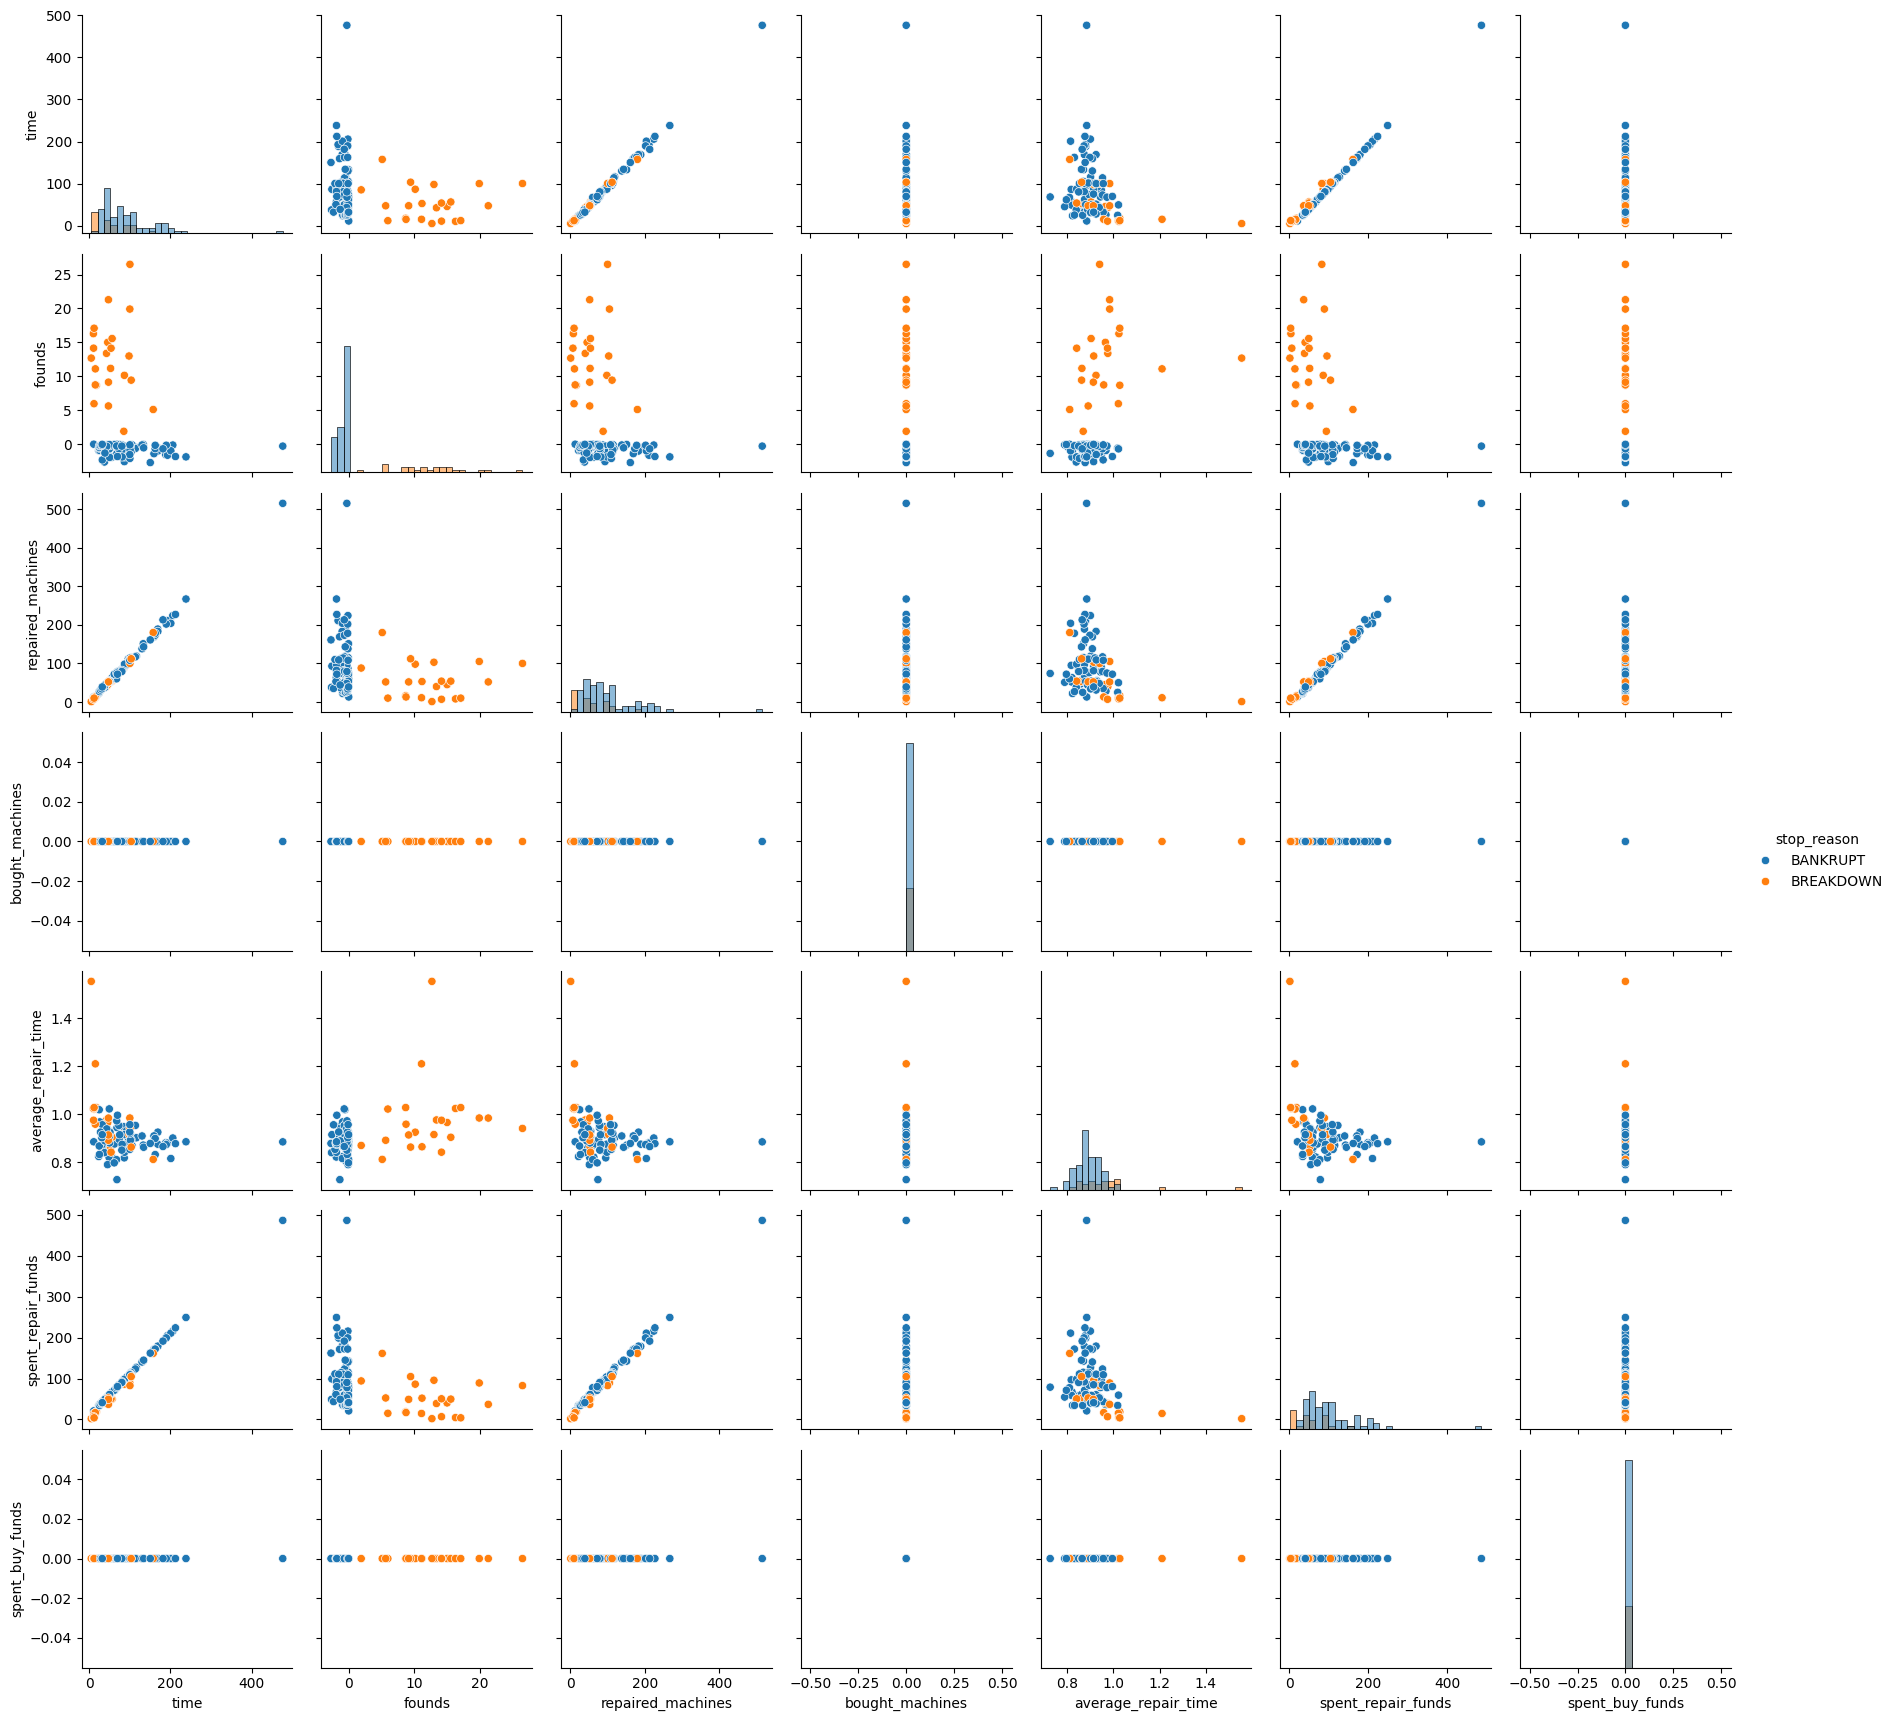

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000         100.000000            100.0   
mean    83.907739    2.243406          90.180000              0.0   
std     66.372032    6.233057          72.785749              0.0   
min      4.929394   -2.707821           1.000000              0.0   
25%     43.769376   -0.941053          47.000000              0.0   
50%     68.244052   -0.291328          74.500000              0.0   
75%    100.800556   -0.016739         111.250000              0.0   
max    476.444388   26.505001         515.000000              0.0   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000            100.0  
mean              0.909083           91.402729              0.0  
std               0.092696           68.078216              0.0  
min               0.727119            2.026526              0.0  
25%               0.864899           49.316617              0.0  
50%               0.894864           78.479355              0.0  
75%               0.940721          110.691393              0.0  
max               1.554499          486.254665              0.0

In [50]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_sn_lg, # funcion de ganancia
                    decition_function_id, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_3_4 = pd.DataFrame(results)

plot = sns.PairGrid(df_3_4, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_3_4.describe()